In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


## Description
In this dataset each record represents a movie-review pair with movie title, description, genres, duration, director, actors, users' ratings, review text, reviewer name, etc. Your task is to build an ML model to predict sentiment of the review text. 
### EVALUATION: F1 score micro

## Necessary imports

In [2]:
import pandas as pd # Library to manipulate dataframes
import numpy as np # To manilupate arrays
import matplotlib.pyplot as plt # to plot graphs and charts
import seaborn as sns # statistical graphs and charts
plt.rcParams['figure.figsize'] = (14,7)

In [3]:
import random
seed_value = 0
np.random.seed(seed_value)
random.seed(seed_value)

## Data loading and storing

In [4]:
train=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
movies=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
test=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')
sample=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv')
print(train.shape)
print(movies.shape)
print(test.shape)
print(sample.shape)

(162758, 5)
(143258, 14)
(55315, 4)
(55315, 2)


## Exploratory data analysis

### Movies dataset quick view

In [5]:
movies.shape

(143258, 14)

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23005 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


#### movies dataset:  143258 rows and 14 columns.
* 2 float columns
* 12 object columns

In [7]:
movies.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [8]:
movies.isna().sum()

movieid                      0
title                        0
audienceScore            70010
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                     0
boxOffice               128515
distributor             120253
soundType               127341
dtype: int64

#### This marks the need of imputing the null values in the columns and discarding those columns having significantly  large number of null values.

In [9]:
movies.describe()

,audienceScore,runtimeMinutes
count,73248.000000,129431.000000
mean,55.674967,93.708578
std,24.553648,28.129175
min,0.000000,1.000000
25%,37.000000,84.000000
50%,57.000000,92.000000
75%,76.000000,103.000000
max,100.000000,2700.000000


#### The values of audienceScore ranges between 0 to 100 while those of runtimeMinutes ranges between 1 to 2700 with a mean value of 92. 
* runtimeMinutes might be associated with outliers.
* Both the numerical features are at different scales. Thus scaling is necessary.

In [10]:
print('train', train.shape)
print('movies',movies.shape)

train (162758, 5)
movies (143258, 14)


In [11]:
movies['movieid'].value_counts() 

escape_the_terminator_tyler_durden_astonish         367
silent_mystery_the_terminator                        17
crimson_james_t._kirk_marty_mcfly_hulk               17
darth_vader_dazzling_courageous_holly_golightly      16
rocky_balboa_wonder_woman_majestic_emerald           16
                                                   ... 
anakin_skywalker_frodo_baggins_t-800_black_widow      1
phantom_hannibal_lecter_don_vito_corleone_pirate      1
v_bruce_wayne_stardust                                1
mystery_lara_croft_tony_montana                       1
wonder_hermione_granger_hulk_v                        1
Name: movieid, Length: 126404, dtype: int64

#### movieids are not unique at all.

In [12]:
movies.dtypes.value_counts()

object     12
float64     2
dtype: int64

## Train data quick view

In [13]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


#### All features in the training set are categorical.
* 4 features
* 1 label - 'sentiment'

In [15]:
train.describe()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
count,162758,162758,162758,156311,162758
unique,16812,4482,2,155071,2
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE
freq,708,962,113189,29,108761


#### Number of unique movieids in training data is also lesser implying that the movieids are repeated. 
* The movieid 'escape_the_terminator_tyler_durden_astonish' has the highest frequency of reviews with a positive sentiment.

In [16]:
train.isna().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

#### Null values in train dataset:
* reviewText has 6447 null values marking the need to impute them.

In [17]:
train['sentiment'].value_counts()

POSITIVE    108761
NEGATIVE     53997
Name: sentiment, dtype: int64

In [18]:
print('Positive :' , (108761/162758)*100)
print('Negative :' , (53997/162758)*100)

Positive : 66.82375059904889
Negative : 33.17624940095111


#### 66.8% of the movie reviews are predicted as postive while only 33.17% of them are predicted as negative. --> class imbalance.

In [19]:
train['movieid'].value_counts()

escape_the_terminator_tyler_durden_astonish    708
fantasy_forrest_gump_intrigue                  245
james_t._kirk_marty_mcfly_astonish             186
marvelous_lara_croft_luke_skywalker            140
michael_corleone_v_marty_mcfly_tony_stark      138
                                              ... 
james_bond_legend_marty_mcfly_elegant            1
myriad_aurora_edward_scissorhands                1
mystic_ferris_bueller_spectacular                1
crimson_velvet                                   1
forrest_gump_fantasy_epic                        1
Name: movieid, Length: 16812, dtype: int64

In [20]:
train.dtypes.value_counts()

object    4
bool      1
dtype: int64

#### Label = 'sentiment' column

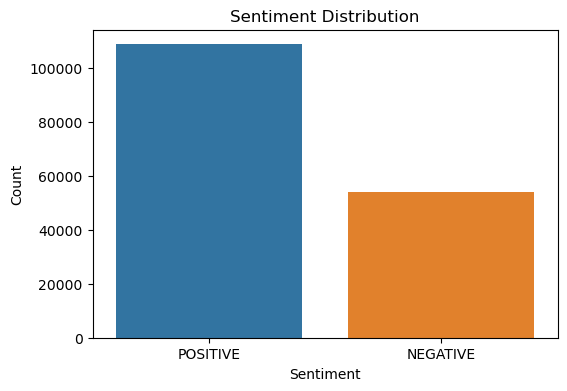

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

#### The distribution of positive labels is significantly greater than the negative labels. There is a huge imbalance in the dataset.

#### Since there is metadata about movies in the movies dataset, there is a need to merge it with train. But movies.csv has duplicate movieids which will result in increasing the number of rows in train.csv on merging. Thus movies.csv needs to be preprocessed before merging it with both train and test data for analysis.

## EDA on movies

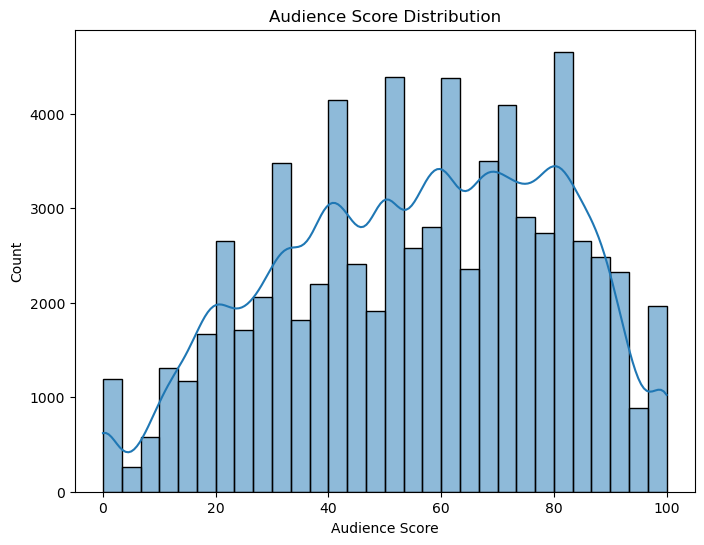

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(movies['audienceScore'].dropna(), bins=30, kde=True)
plt.xlabel('Audience Score')
plt.ylabel('Count')
plt.title('Audience Score Distribution')
plt.show()

* audienceScore is normally distributed in movies dataset.

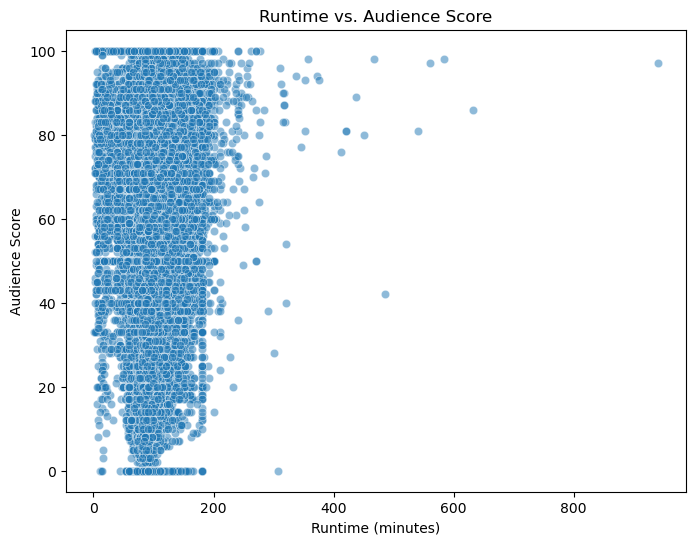

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=movies, x='runtimeMinutes', y='audienceScore', alpha=0.5)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Audience Score')
plt.title('Runtime vs. Audience Score')
plt.show()

#### Most of the movies belong to the runtime range of 0 to 200.
* Very few movies are outside this range but essentially have a high audienceScore as well. 
* This means the outliers are not to be discarded as they are essential for analysis.

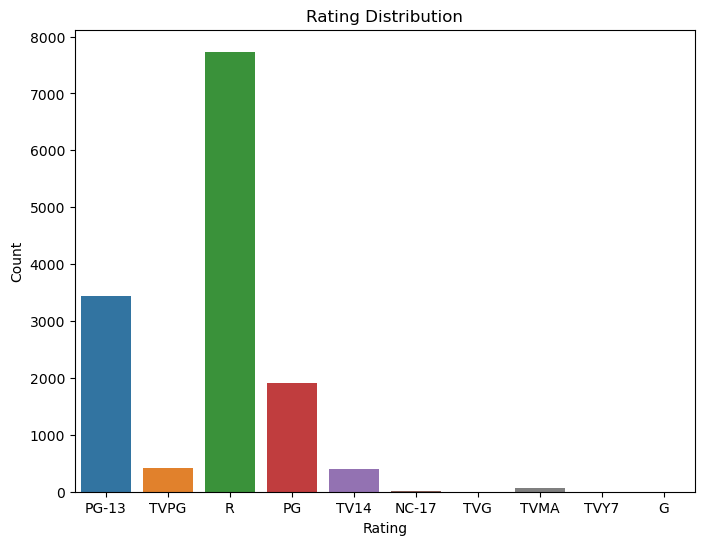

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=movies, x='rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

#### Most of the movies are rated as R followed by PG-13 and PG.

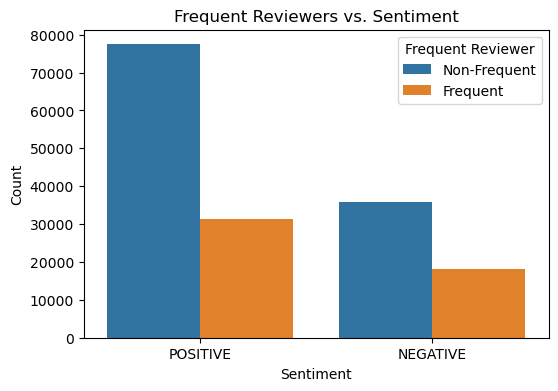

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='sentiment', hue='isFrequentReviewer')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Frequent Reviewers vs. Sentiment')
plt.legend(title='Frequent Reviewer', loc='upper right', labels=['Non-Frequent', 'Frequent'])
plt.show()

#### Most of the frequent reviews are less in number and there are more number of infrequent reviews.
* The distribution of isFrequentReviewer aligns with that of the positive and negative sentiment. 
* It, thus has a significant correlation with the sentiment.

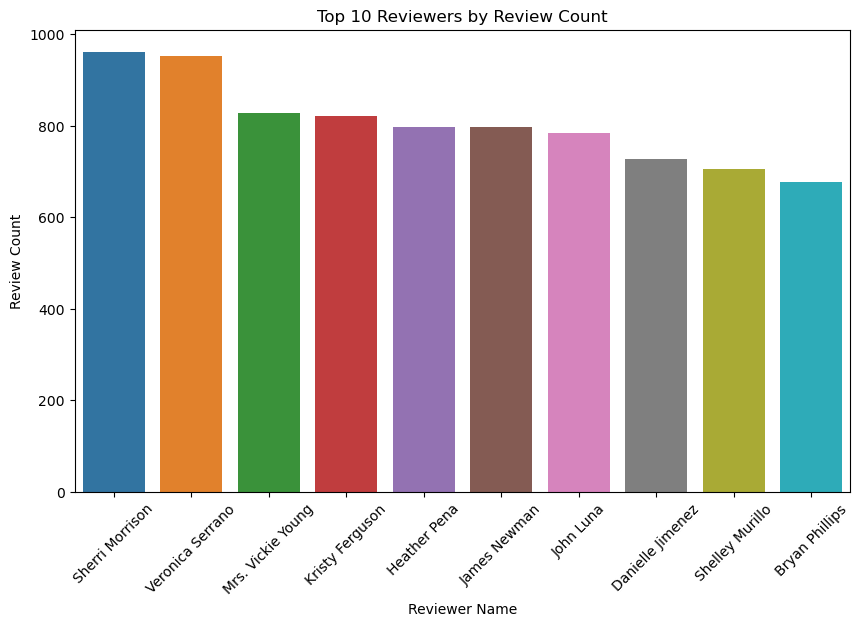

In [26]:
top_reviewers = train['reviewerName'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_reviewers.index, y=top_reviewers.values)
plt.xticks(rotation=45)
plt.xlabel('Reviewer Name')
plt.ylabel('Review Count')
plt.title('Top 10 Reviewers by Review Count')
plt.show()

#### The above graph shows that the reviewer names are not unique and can thus depend on the sentiment depending on whether an optimistic individual is reviewing or a pessimistic individual.

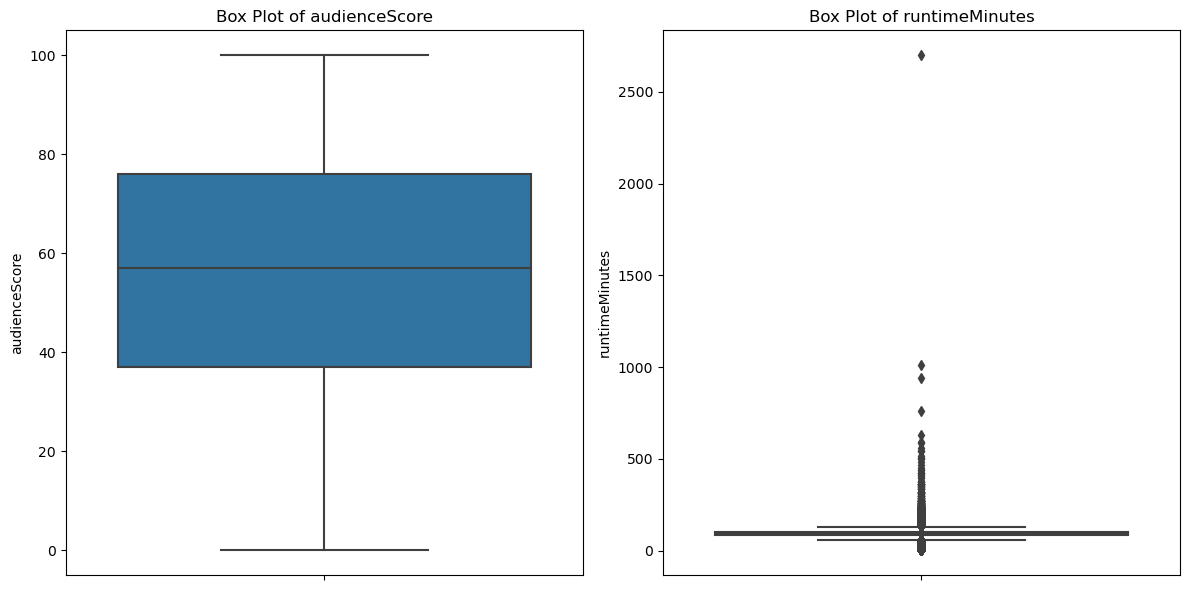

In [27]:
numerical_columns = ['audienceScore', 'runtimeMinutes']

# Create subplots for box plots
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i + 1)
    sns.boxplot(data=movies, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

* There are no outliers in audienceScore.
* There are a large number of outliers in runtimeMinutes

In [28]:
# catcols = movies.select_dtypes(include= 'object').columns.to_list()
# numcols = movies.select_dtypes(exclude= 'object').columns.to_list()

In [29]:
# binary_cols = [col for col in catcols if len(movies[col].unique())== 2]
# binary_cols

In [30]:
# nominal_Cols = [cols for cols in catcols if cols not in binary_cols]
# nominal_Cols

* All the categorical columns in movies are nominal in nature.

In [31]:
# movies[nominal_Cols].nunique().sort_values()

* title and movieid have the same number of unique values as well as the largest number.
* director and releastDateTheaters have a huge number of unique values which may result in large number od features in the dataset on categorical encoding.

Based on the above EDA:
## Preprocessing and Feature engineering the movies dataset.
*  Handling duplicate movieids.
*  Imputing numerical features.
*  Feature engineering the date columns.
*  Dropping redundant features

In [32]:
movies['movieid'].value_counts()

escape_the_terminator_tyler_durden_astonish         367
silent_mystery_the_terminator                        17
crimson_james_t._kirk_marty_mcfly_hulk               17
darth_vader_dazzling_courageous_holly_golightly      16
rocky_balboa_wonder_woman_majestic_emerald           16
                                                   ... 
anakin_skywalker_frodo_baggins_t-800_black_widow      1
phantom_hannibal_lecter_don_vito_corleone_pirate      1
v_bruce_wayne_stardust                                1
mystery_lara_croft_tony_montana                       1
wonder_hermione_granger_hulk_v                        1
Name: movieid, Length: 126404, dtype: int64

In [33]:
movies['title'].value_counts()

Escape The Terminator Tyler Durden Astonish         367
Silent Mystery The Terminator                        17
Crimson James T. Kirk Marty McFly Hulk               17
Darth Vader Dazzling Courageous Holly Golightly      16
Rocky Balboa Wonder Woman Majestic Emerald           16
                                                   ... 
Anakin Skywalker Frodo Baggins T-800 Black Widow      1
Phantom Hannibal Lecter Don Vito Corleone Pirate      1
V Bruce Wayne Stardust                                1
Mystery Lara Croft Tony Montana                       1
Wonder Hermione Granger Hulk V                        1
Name: title, Length: 126404, dtype: int64

As seen above, title is a redundant feature. It does the same work as indexing the database just like movieid.

In [34]:
movies.drop('title', inplace=True, axis=True)

In [35]:
movies['ratingContents'].value_counts()

['Language']                                                                                   365
['V']                                                                                          155
['Some Language']                                                                              143
['Some Violence']                                                                              126
['L']                                                                                          105
                                                                                              ... 
['Incidental Smoking', 'Some Language', 'Mild Thematic Elements']                                1
['Language', 'Drug Material', 'Nudity', 'Sexual Content', 'Strong Violence']                     1
['A Disturbing Image', 'Some Thematic Material']                                                 1
['Pervasive Sexual Content', 'Aberrant Sexuality', 'Some Drug Material', 'Strong Language']      1
['Language

#### Aggregating the movies dataset on movieid to remove duplicates. Retaining the column values as comma separated values for each movieid.

In [36]:
def join_non_null(x):
    non_null_values = list(filter(lambda v: pd.notna(v), x))
    return ', '.join(non_null_values) if non_null_values else np.NaN

In [37]:
consolidated_movies = movies.groupby('movieid').agg({
    'audienceScore': 'mean',
    'rating': lambda x: join_non_null(x),
    'ratingContents':  lambda x: join_non_null(x),
    'releaseDateTheaters': lambda x: join_non_null(x),  # Join non-null values without NaN
    'releaseDateStreaming':  lambda x: join_non_null(x),
    'runtimeMinutes': 'mean',
    'genre': lambda x: join_non_null(x),  # Join non-null values without NaN
    'originalLanguage': lambda x: join_non_null(x),  # Join non-null values without NaN
    'director': lambda x: join_non_null(x),  # Join non-null values without NaN
    'boxOffice':  lambda x: join_non_null(x),
    'distributor': lambda x: join_non_null(x),
    'soundType':  lambda x: join_non_null(x)
}).reset_index()

In [38]:
consolidated_movies['movieid'].value_counts() # unique movie ids

adventure_anakin_skywalker                       1
neo_forrest_gump_willy_wonka_marty_mcfly         1
neo_forrest_gump_magic_jack_sparrow              1
neo_forrest_gump_labyrinth_james_bond            1
neo_forrest_gump_journey                         1
                                                ..
han_solo_chronicles_scarlett_o'hara              1
han_solo_chronicles_iron_man_gandalf_the_grey    1
han_solo_chronicles_gandalf_dorothy_gale         1
han_solo_chronicles_darth_vader                  1
zephyr_wondrous_rick_blaine                      1
Name: movieid, Length: 126404, dtype: int64

In [39]:
consolidated_movies['genre'].value_counts()

Drama                                                                                                                                                                                                  21853
Documentary                                                                                                                                                                                            13587
Comedy                                                                                                                                                                                                  9838
Mystery & thriller                                                                                                                                                                                      5007
Comedy, Drama                                                                                                                                                                       

In [40]:
consolidated_movies.head()

,movieid,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,adventure_anakin_skywalker,49.0,NaN,NaN,NaN,2014-06-17,96.0,Comedy,English,Autumn Gonzalez,NaN,NaN,NaN
1,adventure_anakin_skywalker_chronicles_whisper,NaN,NaN,NaN,NaN,2018-01-16,90.0,Drama,English,Mark Machado,NaN,NaN,NaN
2,adventure_astonish,40.0,NaN,NaN,NaN,2005-02-01,90.0,Comedy,English,Doreen Edison,NaN,NaN,Surround
3,adventure_astonish_wondrous_beneath,60.0,NaN,NaN,NaN,2018-06-24,96.0,Romance,English,Joshua Harper,NaN,NaN,NaN
4,adventure_aurora_epic,NaN,NaN,NaN,NaN,2020-04-17,60.0,Drama,English,Abel Edwards,NaN,NaN,NaN


In [41]:
consolidated_movies.shape

(126404, 13)

In [42]:
consolidated_movies.isna().sum()

movieid                      0
audienceScore            60217
rating                  113085
ratingContents          113085
releaseDateTheaters      97508
releaseDateStreaming     54708
runtimeMinutes           11956
genre                     9607
originalLanguage         11815
director                     0
boxOffice               112199
distributor             104631
soundType               111234
dtype: int64

## Null value imputation and feature engineering of numerical columns in consolidated movies.
* Wise to impute the values of the numerical features with mean in the movies dataset itself because it contains large number of samples containing audienceScore and runtimeMinutes.

In [43]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy = 'mean')
consolidated_movies['audienceScore'] = imputer.fit_transform(consolidated_movies['audienceScore'].values.reshape(-1, 1))
consolidated_movies['runtimeMinutes'] = imputer.fit_transform(consolidated_movies['runtimeMinutes'].values.reshape(-1, 1))

In [44]:
consolidated_movies.isna().sum()

movieid                      0
audienceScore                0
rating                  113085
ratingContents          113085
releaseDateTheaters      97508
releaseDateStreaming     54708
runtimeMinutes               0
genre                     9607
originalLanguage         11815
director                     0
boxOffice               112199
distributor             104631
soundType               111234
dtype: int64

In [45]:
consolidated_movies['boxOffice'].value_counts()

$1.1M           108
$1.2M            93
$1.3M            91
$1.0M            90
$1.6M            65
               ... 
$1.5K, $9.0M      1
$377.4K           1
$104.6M           1
$794              1
$381.0M           1
Name: boxOffice, Length: 5186, dtype: int64

In [46]:
unique_box_office_list = list(set(consolidated_movies['boxOffice'].unique()))
# unique_box_office_list

In [47]:
len(unique_box_office_list)

5187

* Box office can be converted to a numerical column.
* Strip off the '$' sign from the front.
* Strip off the 'M' and multiply the remaining number with million.
* Strip off the 'K' and multiply the remaining number with thousand.

In [48]:
import pandas as pd

def convert_to_numerical(value): # function to convert the boxOffice feature into numerical.
    if pd.notna(value):
        total_value = 0
        values = value.split(', ')
        for val in values:
            if 'M' in val:
                total_value += float(val.replace('$', '').replace('M', '')) * 1_000_000
            elif 'K' in val:
                total_value += float(val.replace('$', '').replace('K', '')) * 1_000
            else:
                total_value += float(val.replace('$', '').replace(',', ''))
        return total_value / len(values)
    else:
        return np.NaN


consolidated_movies['boxOffice'] = consolidated_movies['boxOffice'].apply(lambda x: convert_to_numerical(x))

mean_box_office = consolidated_movies['boxOffice'].mean()
print(mean_box_office)

18301946.22422856


* Imputing the null values of the boxOffice column by mean.

In [49]:
from sklearn.impute import SimpleImputer
boxoffimp=SimpleImputer(strategy = 'mean')
consolidated_movies['boxOffice'] = boxoffimp.fit_transform(consolidated_movies['boxOffice'].values.reshape(-1, 1))

In [50]:
consolidated_movies.isna().sum()

movieid                      0
audienceScore                0
rating                  113085
ratingContents          113085
releaseDateTheaters      97508
releaseDateStreaming     54708
runtimeMinutes               0
genre                     9607
originalLanguage         11815
director                     0
boxOffice                    0
distributor             104631
soundType               111234
dtype: int64

In [51]:
consolidated_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126404 entries, 0 to 126403
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               126404 non-null  object 
 1   audienceScore         126404 non-null  float64
 2   rating                13319 non-null   object 
 3   ratingContents        13319 non-null   object 
 4   releaseDateTheaters   28896 non-null   object 
 5   releaseDateStreaming  71696 non-null   object 
 6   runtimeMinutes        126404 non-null  float64
 7   genre                 116797 non-null  object 
 8   originalLanguage      114589 non-null  object 
 9   director              126404 non-null  object 
 10  boxOffice             126404 non-null  float64
 11  distributor           21773 non-null   object 
 12  soundType             15170 non-null   object 
dtypes: float64(3), object(10)
memory usage: 12.5+ MB


* 3 numerical features and 9 categorical features.

In [52]:
consolidated_movies.head()

,movieid,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,adventure_anakin_skywalker,49.000000,NaN,NaN,NaN,2014-06-17,96.0,Comedy,English,Autumn Gonzalez,1.830195e+07,NaN,NaN
1,adventure_anakin_skywalker_chronicles_whisper,55.821356,NaN,NaN,NaN,2018-01-16,90.0,Drama,English,Mark Machado,1.830195e+07,NaN,NaN
2,adventure_astonish,40.000000,NaN,NaN,NaN,2005-02-01,90.0,Comedy,English,Doreen Edison,1.830195e+07,NaN,Surround
3,adventure_astonish_wondrous_beneath,60.000000,NaN,NaN,NaN,2018-06-24,96.0,Romance,English,Joshua Harper,1.830195e+07,NaN,NaN
4,adventure_aurora_epic,55.821356,NaN,NaN,NaN,2020-04-17,60.0,Drama,English,Abel Edwards,1.830195e+07,NaN,NaN


In [53]:
consolidated_movies['releaseDateTheaters'].value_counts()

2018-09-14                36
2023-02-03                32
2018-09-28                30
2018-10-26                29
2017-10-06                29
                          ..
2007-10-10                 1
2017-08-21                 1
1946-09-20                 1
2001-12-25, 1940-06-28     1
1967-09-20                 1
Name: releaseDateTheaters, Length: 12780, dtype: int64

In [54]:
consolidated_movies['releaseDateStreaming'].value_counts()

2017-05-22                860
2016-11-30                533
2016-08-10                509
2017-05-23                503
2020-04-17                376
                         ... 
2003-08-26, 2014-11-18      1
2015-05-06                  1
2017-02-15, 2018-08-25      1
2005-10-04, 2011-09-27      1
2010-06-08, 2005-07-12      1
Name: releaseDateStreaming, Length: 9875, dtype: int64

Imputing the datetime feature and combining the date columns togethe due to high number of null values.
* replacing null values with ''.
* Joining the 2 column together via comma separated datetime values.
* Converting multiple comma separated datetime values to one by taking the mean.

In [55]:
consolidated_movies['releaseDateTheaters'] = consolidated_movies['releaseDateTheaters'].fillna('')
consolidated_movies['releaseDateStreaming'] = consolidated_movies['releaseDateStreaming'].fillna('')

# Concatenating the dates and handling null values
def join_dates(row):
    theaters_dates = row['releaseDateTheaters']
    streaming_dates = row['releaseDateStreaming']

    if theaters_dates and not streaming_dates:
        return theaters_dates
    elif not theaters_dates and streaming_dates:
        return streaming_dates
    elif theaters_dates and streaming_dates:
        return theaters_dates + ', ' + streaming_dates
    else:
        return None

consolidated_movies['combinedReleaseDates'] = consolidated_movies.apply(join_dates, axis=1)
consolidated_movies['combinedReleaseDates'] = consolidated_movies['combinedReleaseDates'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
#  Calculate the mean the release dates for each movie
consolidated_movies['combinedReleaseDates'] = consolidated_movies['combinedReleaseDates'].apply(lambda dates: pd.to_datetime(dates).mean())

In [56]:
consolidated_movies.isna().sum()

movieid                      0
audienceScore                0
rating                  113085
ratingContents          113085
releaseDateTheaters          0
releaseDateStreaming         0
runtimeMinutes               0
genre                     9607
originalLanguage         11815
director                     0
boxOffice                    0
distributor             104631
soundType               111234
combinedReleaseDates     50503
dtype: int64

* Imputing the null values in combined release dates column with mean and dropping the releaseDateTheaters and releaseDateStreaming columns.

In [57]:
consolidated_movies.sort_values(by='combinedReleaseDates', inplace=True)

# Performing time-based imputation to fill missing values based on nearby dates
consolidated_movies['combinedReleaseDates'] = consolidated_movies['combinedReleaseDates'].fillna(method='ffill')

In [58]:
consolidated_movies.drop(['releaseDateTheaters', 'releaseDateStreaming'], axis=1, inplace=True)

In [59]:
consolidated_movies.head()

,movieid,audienceScore,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType,combinedReleaseDates
10522,courageous_whimsical_james_bond,36.000000,NaN,NaN,44.000000,Drama,NaN,Richard Hawkin,1.830195e+07,NaN,NaN,1904-03-26
48862,hidden_brave_ellis_redding,14.000000,NaN,NaN,19.000000,"Adventure, Fantasy",NaN,Daniel August,1.830195e+07,NaN,NaN,1905-05-29
66314,katniss_everdeen_enigma,67.000000,NaN,NaN,5.000000,"Comedy, Fantasy",NaN,Justin Vanluven,1.830195e+07,NaN,NaN,1908-02-01
54949,infinite_james_bond_luke_skywalker_don_vito_co...,55.821356,NaN,NaN,93.581381,Drama,English,Willie Britcher,1.830195e+07,Biograph Company,NaN,1909-06-10
162,adventure_frodo_baggins_eclipse,55.821356,NaN,NaN,11.000000,Western,NaN,Willie Britcher,1.830195e+07,Biograph Company,NaN,1909-07-19


#### Separating the train dataset into features -X and label -y.

In [60]:
X=train.drop('sentiment', axis=1)
y=train['sentiment'].copy()

In [61]:
X.shape

(162758, 4)

#### Splitting the training set into train and test set to gauge the accuracy on unseen data as well as training data.

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Merging train and test data with movies dataset

In [63]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix, hstack

* Performing a left merge because the number of predictions should be equal to the number of rows in test data and thus the number of rows in training data should not be disturbed at all.

In [64]:
X_train = X_train.merge(consolidated_movies, on='movieid', how='left')
X_test = X_test.merge(consolidated_movies, on='movieid', how='left')
# test_merged_data=test.merge(consolidated_movies, on='movieid', how='left')

In [65]:
X_train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,audienceScore,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType,combinedReleaseDates
0,holly_golightly_zephyr,Zachary Lambert,False,"If patience isn't a virtue you possess, pass o...",87.000000,PG-13,['Some Language'],116.000000,Drama,English,Mark Yanez,1.626000e+08,Sony Pictures,"Dolby SRD, DTS, SDDS",2007-02-04 00:00:00
1,v_phenomenal_jason_bourne,Penny Wells,True,Pelican Blood is one of the year's most fearle...,61.000000,NaN,NaN,107.500000,"Drama, Drama","English, German","Frederick Dugger, Joesph Densmore",1.830195e+07,NaN,NaN,2017-07-14 00:00:00
2,vito_corleone_whisper_james_t._kirk_katniss_ev...,Cynthia Murphy,True,"This isn't the cute, accessible period piece t...",74.000000,R,"['Some Sexual References', 'Language']",104.000000,"Drama, Comedy, Music",English,Natalie Foreman,1.320000e+07,CBS Films,"SDDS, Dolby Digital, Datasat",2014-01-29 12:00:00
3,enigma_tyler_durden_radiant_enigma,Ralph Dean,False,It works as both a concert film and as a case ...,86.666667,"PG, PG","['Thematic Elements', 'Some Mild Language'], [...",112.333333,"Documentary, Documentary, Musical, Romance","English, English, English","Jackson Martin, Jackson Martin, Carmela Neff",4.000000e+06,"Fox, Fox, Warner Bros.",Mono,1993-07-08 12:00:00
4,edward_scissorhands_witch_katniss_everdeen,Justin Becker,True,Drive My Car is one of 2021's best films.,78.000000,NaN,NaN,179.000000,Drama,Japanese,William Melugin,2.300000e+06,Sideshow / Janus Films,Dolby Digital,2022-01-12 00:00:00


### Since movieid is the index, it is safe to drop it and work with the row indices of the dataframe.

In [66]:
X_train.drop('movieid', axis=1,inplace=True)
X_test.drop('movieid', axis=1,inplace=True)

In [67]:
X_train.isna().sum()

reviewerName                0
isFrequentReviewer          0
reviewText               4501
audienceScore               0
rating                  31200
ratingContents          31200
runtimeMinutes              0
genre                     360
originalLanguage          510
director                    0
boxOffice                   0
distributor             14310
soundType               48435
combinedReleaseDates        0
dtype: int64

In [68]:
X_test.isna().sum()

reviewerName                0
isFrequentReviewer          0
reviewText               1946
audienceScore               0
rating                  13387
ratingContents          13387
runtimeMinutes              0
genre                     161
originalLanguage          216
director                    0
boxOffice                   0
distributor              6179
soundType               20857
combinedReleaseDates        0
dtype: int64

#### The column soundType has 42% null values (close to half). Thus safe to drop.

In [69]:
X_train.drop('soundType', axis=1, inplace=True)
X_test.drop('soundType', axis=1, inplace=True)

In [70]:
X_train.head()

,reviewerName,isFrequentReviewer,reviewText,audienceScore,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,combinedReleaseDates
0,Zachary Lambert,False,"If patience isn't a virtue you possess, pass o...",87.000000,PG-13,['Some Language'],116.000000,Drama,English,Mark Yanez,1.626000e+08,Sony Pictures,2007-02-04 00:00:00
1,Penny Wells,True,Pelican Blood is one of the year's most fearle...,61.000000,NaN,NaN,107.500000,"Drama, Drama","English, German","Frederick Dugger, Joesph Densmore",1.830195e+07,NaN,2017-07-14 00:00:00
2,Cynthia Murphy,True,"This isn't the cute, accessible period piece t...",74.000000,R,"['Some Sexual References', 'Language']",104.000000,"Drama, Comedy, Music",English,Natalie Foreman,1.320000e+07,CBS Films,2014-01-29 12:00:00
3,Ralph Dean,False,It works as both a concert film and as a case ...,86.666667,"PG, PG","['Thematic Elements', 'Some Mild Language'], [...",112.333333,"Documentary, Documentary, Musical, Romance","English, English, English","Jackson Martin, Jackson Martin, Carmela Neff",4.000000e+06,"Fox, Fox, Warner Bros.",1993-07-08 12:00:00
4,Justin Becker,True,Drive My Car is one of 2021's best films.,78.000000,NaN,NaN,179.000000,Drama,Japanese,William Melugin,2.300000e+06,Sideshow / Janus Films,2022-01-12 00:00:00


In [71]:
X_train['combinedReleaseDates'].value_counts()

2028-12-22 00:00:00.000000000    1420
2007-04-05 08:28:14.117647104     491
2011-09-26 00:00:00.000000000     168
2016-04-13 12:00:00.000000000     163
2014-10-05 00:00:00.000000000     148
                                 ... 
2016-11-21 00:00:00.000000000       1
1998-11-10 00:00:00.000000000       1
2003-12-23 00:00:00.000000000       1
2009-01-14 12:00:00.000000000       1
1992-09-08 12:00:00.000000000       1
Name: combinedReleaseDates, Length: 9054, dtype: int64

#### Since the datetime column has a very wide range of datetime objects, only the year is extracted to prevent the overflow of features while encoding. Also the variability is on an yearly basis and it thus makes sense to consider the year.

In [72]:
X_train['year'] = X_train['combinedReleaseDates'].dt.year.astype(str)

# Now 'year' column will contain the year extracted from the datetime values
print(X_train['year'])

0         2007
1         2017
2         2014
3         1993
4         2022
          ... 
113925    2015
113926    2019
113927    2007
113928    2010
113929    2021
Name: year, Length: 113930, dtype: object


In [73]:
X_test['year'] = X_test['combinedReleaseDates'].dt.year.astype(str)

# Now 'year' column will contain the year extracted from the datetime values
print(X_test['year'])

0        2013
1        2017
2        2008
3        1971
4        2003
         ... 
48823    2014
48824    2008
48825    2004
48826    2004
48827    2021
Name: year, Length: 48828, dtype: object


In [74]:
X_train.drop('combinedReleaseDates', axis=1, inplace=True)
X_test.drop('combinedReleaseDates', axis=1, inplace=True)

## Now only train data first

## Imputing 

In [75]:
X_train.isna().sum()

reviewerName              0
isFrequentReviewer        0
reviewText             4501
audienceScore             0
rating                31200
ratingContents        31200
runtimeMinutes            0
genre                   360
originalLanguage        510
director                  0
boxOffice                 0
distributor           14310
year                      0
dtype: int64

In [76]:
X_train['genre'].fillna('Unknown', inplace=True)
X_train['originalLanguage'].fillna('Unknownlanguage', inplace=True)
X_train['rating'].fillna('No rating', inplace=True)
X_train['distributor'].fillna('No distributor' , inplace=True)
X_train['reviewText'].fillna('', inplace=True)
def join_list_to_string(lst):
    if pd.isna(lst):  # Check if lst is NaN
        return ['No ratingContent']
    return lst

# Apply the custom function to the "ratingContents" column
X_train['ratingContents'] = X_train['ratingContents'].apply(join_list_to_string)

In [77]:
X_train.isna().sum()

reviewerName          0
isFrequentReviewer    0
reviewText            0
audienceScore         0
rating                0
ratingContents        0
runtimeMinutes        0
genre                 0
originalLanguage      0
director              0
boxOffice             0
distributor           0
year                  0
dtype: int64

* All the features have been successfully imputed and now we can focus on  categorical feature encoding.

## Create a pipeline to encode features

In [78]:
X_train.head()

,reviewerName,isFrequentReviewer,reviewText,audienceScore,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,year
0,Zachary Lambert,False,"If patience isn't a virtue you possess, pass o...",87.000000,PG-13,['Some Language'],116.000000,Drama,English,Mark Yanez,1.626000e+08,Sony Pictures,2007
1,Penny Wells,True,Pelican Blood is one of the year's most fearle...,61.000000,No rating,[No ratingContent],107.500000,"Drama, Drama","English, German","Frederick Dugger, Joesph Densmore",1.830195e+07,No distributor,2017
2,Cynthia Murphy,True,"This isn't the cute, accessible period piece t...",74.000000,R,"['Some Sexual References', 'Language']",104.000000,"Drama, Comedy, Music",English,Natalie Foreman,1.320000e+07,CBS Films,2014
3,Ralph Dean,False,It works as both a concert film and as a case ...,86.666667,"PG, PG","['Thematic Elements', 'Some Mild Language'], [...",112.333333,"Documentary, Documentary, Musical, Romance","English, English, English","Jackson Martin, Jackson Martin, Carmela Neff",4.000000e+06,"Fox, Fox, Warner Bros.",1993
4,Justin Becker,True,Drive My Car is one of 2021's best films.,78.000000,No rating,[No ratingContent],179.000000,Drama,Japanese,William Melugin,2.300000e+06,Sideshow / Janus Films,2022


##  Feature engineering: Convert comma-separated string values into lists of values

In [79]:
X_train['genre'].value_counts()

Drama                                                        10897
Comedy                                                        6163
Comedy, Drama                                                 5343
Documentary                                                   5153
Romance, Comedy                                               2453
                                                             ...  
Documentary, Drama, Mystery & thriller, Documentary              1
Comedy, Comedy, Drama, War, Mystery & thriller, Animation        1
Drama, Action, Romance, Comedy, Adventure                        1
Romance, Drama, Crime, Drama                                     1
Biography, Drama, Comedy, Drama, Drama                           1
Name: genre, Length: 3158, dtype: int64

* The comma separated values have repeated occurrences of genre.
* Need to eliminate these repeated occurrences.
* Convert the comma separated strings into lists of unique values for each row.
* Multilabelbinarize these values  - It will create a column for each value in the list.

In [80]:
X_train['genre'] = X_train['genre'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
X_train['originalLanguage'] = X_train['originalLanguage'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
X_train['rating'] = X_train['rating'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
X_train['director'] = X_train['director'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else x)
X_train['distributor'] = X_train['distributor'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])

def strip_rating_contents(rating_contents):
  """Strip the beginning [ and ending ] from the list entry in each row,
  and strip off the '' of the strings inside it also to just make a comma
  separated Sexual Content, Drug Content, Thematic Elements.

  Args:
    rating_contents: The rating contents column of the DataFrame.

  Returns:
    A string of the comma separated Sexual Content, Drug Content, Thematic Elements.
  """
  rating_contents = str(rating_contents)
  rating_contents = rating_contents.replace("[", "")
  rating_contents = rating_contents.replace("]", "")
  rating_contents = rating_contents.replace("'", "")
  return rating_contents

X_train["ratingContents"] = X_train["ratingContents"].apply(strip_rating_contents)
X_train['ratingContents'] = X_train['ratingContents'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])

## Scaling numerical features and creating pipeline

In [81]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [82]:
X_train.isna().sum()

reviewerName          0
isFrequentReviewer    0
reviewText            0
audienceScore         0
rating                0
ratingContents        0
runtimeMinutes        0
genre                 0
originalLanguage      0
director              0
boxOffice             0
distributor           0
year                  0
dtype: int64

* Since the numerical features are normally distributed, it is worth using Standard Scaler to scale them.

In [83]:
numeric_features = ['runtimeMinutes', 'audienceScore', 'boxOffice']
# Create a pipeline for standard scaling of numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
# Apply the pipeline to the numeric features
X_train[numeric_features] = numeric_transformer.fit_transform(X_train[numeric_features])

In [84]:
X_train.head()

,reviewerName,isFrequentReviewer,reviewText,audienceScore,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,year
0,Zachary Lambert,False,"If patience isn't a virtue you possess, pass o...",1.212310,[PG-13],[Some Language],0.465511,[Drama],[English],[Mark Yanez],1.520972,[Sony Pictures],2007
1,Penny Wells,True,Pelican Blood is one of the year's most fearle...,-0.207351,[No rating],[No ratingContent],0.042312,[Drama],"[English, German]","[Frederick Dugger, Joesph Densmore]",-0.308527,[No distributor],2017
2,Cynthia Murphy,True,"This isn't the cute, accessible period piece t...",0.502479,[R],"[Language, Some Sexual References]",-0.131947,"[Comedy, Music, Drama]",[English],[Natalie Foreman],-0.373212,[CBS Films],2014
3,Ralph Dean,False,It works as both a concert film and as a case ...,1.194109,[PG],"[Some Mild Language, Thematic Elements]",0.282954,"[Documentary, Romance, Musical]",[English],"[Jackson Martin, Carmela Neff]",-0.489855,"[Fox, Warner Bros.]",1993
4,Justin Becker,True,Drive My Car is one of 2021's best films.,0.720888,[No rating],[No ratingContent],3.602161,[Drama],[Japanese],[William Melugin],-0.511409,[Sideshow / Janus Films],2022


In [85]:
X_train.shape

(113930, 13)

## Encoding ategorical features

In [86]:
X_train.head()

,reviewerName,isFrequentReviewer,reviewText,audienceScore,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,year
0,Zachary Lambert,False,"If patience isn't a virtue you possess, pass o...",1.212310,[PG-13],[Some Language],0.465511,[Drama],[English],[Mark Yanez],1.520972,[Sony Pictures],2007
1,Penny Wells,True,Pelican Blood is one of the year's most fearle...,-0.207351,[No rating],[No ratingContent],0.042312,[Drama],"[English, German]","[Frederick Dugger, Joesph Densmore]",-0.308527,[No distributor],2017
2,Cynthia Murphy,True,"This isn't the cute, accessible period piece t...",0.502479,[R],"[Language, Some Sexual References]",-0.131947,"[Comedy, Music, Drama]",[English],[Natalie Foreman],-0.373212,[CBS Films],2014
3,Ralph Dean,False,It works as both a concert film and as a case ...,1.194109,[PG],"[Some Mild Language, Thematic Elements]",0.282954,"[Documentary, Romance, Musical]",[English],"[Jackson Martin, Carmela Neff]",-0.489855,"[Fox, Warner Bros.]",1993
4,Justin Becker,True,Drive My Car is one of 2021's best films.,0.720888,[No rating],[No ratingContent],3.602161,[Drama],[Japanese],[William Melugin],-0.511409,[Sideshow / Janus Films],2022


In [87]:
X_train['isFrequentReviewer'].value_counts()

False    79208
True     34722
Name: isFrequentReviewer, dtype: int64

* This is a boolean feature and can directly be converted into a numerical feature.

In [88]:
X_train['isFrequentReviewer'] = X_train['isFrequentReviewer'].astype(int)

In [89]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer

In [90]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
# Apply MultiLabelBinarizer to one-hot encode the lists of genres
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(X_train['genre'])
# Create a DataFrame from the encoded genres
genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=X_train.index)
# Concatenate the original DataFrame with the encoded DataFrame
X_train= pd.concat([X_train, genre_encoded_df], axis=1)
# Drop the original 'genre' column as it is no longer needed
X_train.drop('genre', axis=1, inplace=True)

In [91]:
originalLanguagemlb = MultiLabelBinarizer()
originalLanguage_encoded = originalLanguagemlb.fit_transform(X_train['originalLanguage'])
originalLanguage_encoded_df = pd.DataFrame(originalLanguage_encoded, columns=originalLanguagemlb.classes_, index=X_train.index)
X_train= pd.concat([X_train, originalLanguage_encoded_df], axis=1)
X_train.drop('originalLanguage', axis=1, inplace=True)

In [92]:
ratingmlb = MultiLabelBinarizer()
rating_encoded = ratingmlb.fit_transform(X_train['rating'])
rating_encoded_df = pd.DataFrame(rating_encoded, columns=ratingmlb.classes_, index=X_train.index)
X_train= pd.concat([X_train, rating_encoded_df], axis=1)
X_train.drop('rating', axis=1, inplace=True)

* Since reviewText is a pure text feature, tfidfvectorizer is used to transform it.

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(X_train['reviewText'])

In [95]:
X_train.drop('reviewText', axis=1, inplace=True) # dropping since we have a sparse output of tfidf stored in tfidf_matrix.

In [96]:
X_train.shape

(113930, 146)

In [97]:
X_train['director'].value_counts()

[Mary Loftus, April Proctor, Dana Slater, Joelle Ceasar, Elizabeth Wilder, Francisco Burris, Katherine Hedgpeth, Kathleen Alexander, Heather Lowery, German Frierson, David Ocampo, Stephanie Russell, Larry Rubio, Malcolm Smith, Robert Demello, Philip Rice, Stanley Martino, Dorene Harrison, Billy Mosher, Mary Garrett, Willie Brady, Alec Estes, Edward Davis, Wendy Burchfield, Augusta Daniel, Frank Hoover, David Carrico, Dorothy Coleman, David Wilmot, Gregory Hart, Roy Hutchingson, Herb Stuart, David Mccartney, Peter Garrett, Edna Wheeler, Quentin Mejia, Joseph Brooks, Dawn Steele, Raquel Polley, Robert Isaac, Idella Rivera, Howard Gregory, Christina Riley, Michelle Numbers, Roger Murrell, Maria Moore, Orpha Richard, Rosa Beauregard, Mary Champagne, Edwin Mosley, Gary Greene, Dana Blais, Timothy Gatlin, Diane Pereira, Edward Petty, Laura Soto, Michael Carvalho, Julia Burgos, Charlie Mcintosh, Brenda Glynn, Louis Rieck, Shirley Harris, Jennifer Hinds, Harold Harris, Michael Moser, Damian Ka

In [98]:
directormlb = MultiLabelBinarizer(sparse_output=True)
director_encoded = directormlb.fit_transform(X_train['director'])

In [99]:
director_encoded.shape

(113930, 12361)

In [100]:
yearmlb = MultiLabelBinarizer(sparse_output=True)
year_encoded = yearmlb.fit_transform(X_train['year'])

In [101]:
year_encoded.shape

(113930, 10)

In [102]:
distributormlb = MultiLabelBinarizer(sparse_output=True)
distributor_encoded = distributormlb.fit_transform(X_train['distributor'])
reviewerNamemlb = MultiLabelBinarizer(sparse_output=True)
reviewerName_encoded = reviewerNamemlb.fit_transform(X_train['reviewerName'])
ratingContentsmlb = MultiLabelBinarizer(sparse_output=True)
ratingContents_encoded = ratingContentsmlb.fit_transform(X_train['ratingContents'])

In [103]:
ratingContents_encoded.shape

(113930, 1694)

In [104]:
X_train.head()

,reviewerName,isFrequentReviewer,audienceScore,ratingContents,runtimeMinutes,director,boxOffice,distributor,year,Action,...,crp,smi,NC-17,No rating,PG,PG-13,R,TV14,TVMA,TVPG
0,Zachary Lambert,0,1.212310,[Some Language],0.465511,[Mark Yanez],1.520972,[Sony Pictures],2007,0,...,0,0,0,0,0,1,0,0,0,0
1,Penny Wells,1,-0.207351,[No ratingContent],0.042312,"[Frederick Dugger, Joesph Densmore]",-0.308527,[No distributor],2017,0,...,0,0,0,1,0,0,0,0,0,0
2,Cynthia Murphy,1,0.502479,"[Language, Some Sexual References]",-0.131947,[Natalie Foreman],-0.373212,[CBS Films],2014,0,...,0,0,0,0,0,0,1,0,0,0
3,Ralph Dean,0,1.194109,"[Some Mild Language, Thematic Elements]",0.282954,"[Jackson Martin, Carmela Neff]",-0.489855,"[Fox, Warner Bros.]",1993,0,...,0,0,0,0,1,0,0,0,0,0
4,Justin Becker,1,0.720888,[No ratingContent],3.602161,[William Melugin],-0.511409,[Sideshow / Janus Films],2022,0,...,0,0,0,1,0,0,0,0,0,0


In [105]:
X_train.dtypes

reviewerName           object
isFrequentReviewer      int64
audienceScore         float64
ratingContents         object
runtimeMinutes        float64
                       ...   
PG-13                   int64
R                       int64
TV14                    int64
TVMA                    int64
TVPG                    int64
Length: 146, dtype: object

In [106]:
from scipy.sparse import csr_matrix, hstack
# Drop the categorical features from the X_train dataframe
X_train_sparse = X_train.drop(['director', 'year', 'distributor', 'reviewerName', 'ratingContents'], axis=1)
# Convert the remaining dataframe to a sparse matrix in CSR format
X_train_sparse = csr_matrix(X_train_sparse)
# Combine the sparse matrices
combined_sparse = hstack([X_train_sparse, director_encoded, year_encoded, distributor_encoded, reviewerName_encoded, tfidf_matrix], format='csr')

In [107]:
combined_sparse.shape

(113930, 70873)

In [108]:
combined_sparse.dtype

dtype('float64')

* converting the labels to numerical representation.

In [109]:
y_train = y_train.map({'POSITIVE': 1, 'NEGATIVE': 0})

## Repeating the same preprocessing on X_test.

In [110]:
X_test['genre'].fillna('Unknown', inplace=True)
X_test['originalLanguage'].fillna('Unknownlanguage', inplace=True)
X_test['reviewText'].fillna('', inplace=True)
X_test['rating'].fillna('No rating', inplace=True)
X_test['distributor'].fillna('No distributor' , inplace=True)
def join_list_to_string(lst):
    if pd.isna(lst):  # Check if lst is NaN
        return ['No ratingContent']
    return lst

# Apply the custom function to the "ratingContents" column
X_test['ratingContents'] = X_test['ratingContents'].apply(join_list_to_string)

In [111]:
X_test['genre'] = X_test['genre'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
X_test['originalLanguage'] = X_test['originalLanguage'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
X_test['rating'] = X_test['rating'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
X_test['director'] = X_test['director'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else x)
X_test['distributor'] = X_test['distributor'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])

def strip_rating_contents(rating_contents):
  """Strips the beginning [ and ending ] from the list entry in each row,
  and strips off the '' of the strings inside it also to just make a comma
  separated Sexual Content, Drug Content, Thematic Elements.

  Args:
    rating_contents: The rating contents column of the DataFrame.

  Returns:
    A string of the comma separated Sexual Content, Drug Content, Thematic Elements.
  """
  rating_contents = str(rating_contents)
  rating_contents = rating_contents.replace("[", "")
  rating_contents = rating_contents.replace("]", "")
  rating_contents = rating_contents.replace("'", "")
  return rating_contents

X_test["ratingContents"] = X_test["ratingContents"].apply(strip_rating_contents)
X_test['ratingContents'] = X_test['ratingContents'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])

In [112]:
X_test[numeric_features] = numeric_transformer.transform(X_test[numeric_features])

In [113]:
X_test['isFrequentReviewer'] = X_test['isFrequentReviewer'].astype(int)

In [114]:
genre_encoded = mlb.transform(X_test['genre'])
genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=X_test.index)
X_test= pd.concat([X_test, genre_encoded_df], axis=1)
X_test.drop('genre', axis=1, inplace=True)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['News', 'Variety'] will be ignored
  warnings.warn(


In [115]:
originalLanguage_encoded = originalLanguagemlb.transform(X_test['originalLanguage'])
originalLanguage_encoded_df = pd.DataFrame(originalLanguage_encoded, columns=originalLanguagemlb.classes_, index=X_test.index)
X_test= pd.concat([X_test, originalLanguage_encoded_df], axis=1)
X_test.drop('originalLanguage', axis=1, inplace=True)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Azerbaijani'] will be ignored
  warnings.warn(


In [116]:
rating_encoded = ratingmlb.transform(X_test['rating'])
rating_encoded_df = pd.DataFrame(rating_encoded, columns=ratingmlb.classes_, index=X_test.index)
X_test= pd.concat([X_test, rating_encoded_df], axis=1)
X_test.drop('rating', axis=1, inplace=True)

In [117]:
tfidf_matrix = tfidf_vectorizer.transform(X_test['reviewText'])
X_test.drop('reviewText', axis=1, inplace=True)

In [118]:
director_encoded = directormlb.transform(X_test['director'])
director_encoded.shape

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Adam Bantz', 'Adam Herron', 'Adeline Piirto', 'Aide Siske', 'Alba Garcia', 'Albert Rokus', 'Alex Mcintosh', 'Alfonso Cordero', 'Alfreda Miyamoto', 'Alicia Reyes', 'Allen Edmondson', 'Allison Copeland', 'Alma Mccoy', 'Alvin Davis', 'Alvin Gulley', 'Alvin Heck', 'Amanda Forney', 'Amanda Sells', 'America Graham', 'Amy Garo', 'Amy Taylor', 'Amy Tice', 'Amy Turk', 'Andre Thomason', 'Andre Woods', 'Andres Haskell', 'Andrew Bryan', 'Andrew Campbell', 'Andrew Compton', 'Andrew Crumpton', 'Andrew Erdman', 'Andrew Long', 'Andrew Love', 'Angela Dillon', 'Angela Pagliaro', 'Anglea Dowell', 'Anita Born', 'Ann Kline', 'Anna Cardero', 'Annette Dawson', 'Annie Jackson', 'Anthony Piper', 'Antonio Bohl', 'April Kann', 'Arlean Jones', 'Armando Boudreaux', 'Arnold Huff', 'Arthur Crumley', 'Arthur Stephens', 'Arturo Fields', 'Ashley Arnold', 'Audrey Rooks', 'Aurore Venneri', 'Barbara Doak', 'Barbar

(48828, 12361)

In [119]:
year_encoded = yearmlb.transform(X_test['year'])
distributor_encoded = distributormlb.transform(X_test['distributor'])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['101 Films', '20th Century Fox Intl.', '3D Entertainment', 'Academy Pictures Corp.', 'Almi Pictures', 'American Film Co.', 'American Home Entertainment', 'Ammo Content', 'Anywhere Road Entertainment', 'Ariel Video', 'Best Served Cold', 'CARTEL', 'Chicago Audio Works', 'CineGalaxy', 'Cinecom Pictures', 'Cinema Group', 'Combs Entertainment', 'Comedy Central', 'Corinth Films [us]', 'Davis-Royal', 'ESX Entertainment', 'Eros Pictures', "Film-Makers' Cooperative", 'Franchise Pictures', 'Full Exposure Films', 'Gathr Films', 'Hewes Pictures', 'Let It Play', 'Live Nation Productions', 'Lux Film Distributing Corporation', 'Majestic Films International', 'Manifold Productions', 'Maya Releasing', 'Meridian Hill Pictures', 'Motion Film Group', 'Oscilloscope', 'PCH Films', 'Petri Entertainment', 'Present Pictures', 'Roissy Films', 'Shella Films', 'SingularDTV', 'Star Studios', 'Tandem Picture

In [120]:
reviewerName_encoded = reviewerNamemlb.transform(X_test['reviewerName'])
ratingContents_encoded = ratingContentsmlb.transform(X_test['ratingContents'])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['A Crude Reference', 'A Scene of Menace', 'Brief Sexual Content/Nudity', 'Descriptions of Crucifixion', 'Hardships', 'Mild Peril and Rude Humor', 'Some Suggestive/Rude Humor', 'Strong/Crude Sexual Content'] will be ignored
  warnings.warn(


In [121]:
X_test_sparse = X_test.drop(['director', 'year', 'distributor', 'reviewerName', 'ratingContents'], axis=1)
X_test_sparse = csr_matrix(X_test_sparse)
test_combined_sparse = hstack([X_test_sparse, director_encoded, year_encoded, distributor_encoded, reviewerName_encoded, tfidf_matrix], format='csr')

In [122]:
y_test = y_test.map({'POSITIVE': 1, 'NEGATIVE': 0})

## Dummy Classifier

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
# from sklearn.dummy import DummyClassifier
# model = DummyClassifier()
# model.fit(combined_sparse, y_train)
# y_pred_train = model.predict(combined_sparse)
# accuracy = accuracy_score(y_train, y_pred_train)
# print("Accuracy:", accuracy)

In [125]:
# y_pred_test = model.predict(test_combined_sparse)
# accuracy = accuracy_score(y_test, y_pred_test)
# print("Accuracy:", accuracy)

## Modularised preprocessing below to be used further.

In [126]:
from sklearn.model_selection import GridSearchCV
def join_list_to_string(lst):
    if pd.isna(lst):  # Check if lst is NaN
        return ['No ratingContent']
    return lst
def strip_rating_contents(rating_contents):
  """Strips the beginning [ and ending ] from the list entry in each row,
  and strips off the '' of the strings inside it also to just make a comma
  separated Sexual Content, Drug Content, Thematic Elements.

  Args:
    rating_contents: The rating contents column of the DataFrame.

  Returns:
    A string of the comma separated Sexual Content, Drug Content, Thematic Elements.
  """
  rating_contents = str(rating_contents)
  rating_contents = rating_contents.replace("[", "")
  rating_contents = rating_contents.replace("]", "")
  rating_contents = rating_contents.replace("'", "")
  return rating_contents
def preprocess(df):
    df = df.merge(consolidated_movies, on='movieid', how='left')
    df.drop('movieid', axis=1,inplace=True)
    df.drop('soundType', axis=1, inplace=True)
    df['year'] = df['combinedReleaseDates'].dt.year.astype(str)
    df.drop('combinedReleaseDates', axis=1, inplace=True)
    ########imputation#######
    df['genre'].fillna('Unknown', inplace=True)
    df['originalLanguage'].fillna('Unknownlanguage', inplace=True)
    df['rating'].fillna('No rating', inplace=True)
    df['distributor'].fillna('No distributor' , inplace=True)
    df['reviewText'].fillna('', inplace=True)
    # Apply the custom function to the "ratingContents" column
    df['ratingContents'] = df['ratingContents'].apply(join_list_to_string)
    ############feature engineering ##########
    df['genre'] = df['genre'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
    df['originalLanguage'] = df['originalLanguage'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
    df['rating'] = df['rating'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
    df['director'] = df['director'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else x)
    df['distributor'] = df['distributor'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
    df["ratingContents"] = df["ratingContents"].apply(strip_rating_contents)
    df['ratingContents'] = df['ratingContents'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
    return df

def preprocessdatasets(X_train,X_test, y_train,y_test):
    X_train = preprocess(X_train)
    X_test=preprocess(X_test)
    numeric_features = ['runtimeMinutes', 'audienceScore', 'boxOffice']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    X_train[numeric_features] = numeric_transformer.fit_transform(X_train[numeric_features])
    X_train['isFrequentReviewer'] = X_train['isFrequentReviewer'].astype(int)
    mlb = MultiLabelBinarizer()
    genre_encoded = mlb.fit_transform(X_train['genre'])
    genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=X_train.index)
    X_train= pd.concat([X_train, genre_encoded_df], axis=1)
    X_train.drop('genre', axis=1, inplace=True)
    originalLanguagemlb = MultiLabelBinarizer()
    originalLanguage_encoded = originalLanguagemlb.fit_transform(X_train['originalLanguage'])
    originalLanguage_encoded_df = pd.DataFrame(originalLanguage_encoded, columns=originalLanguagemlb.classes_, index=X_train.index)
    X_train= pd.concat([X_train, originalLanguage_encoded_df], axis=1)
    X_train.drop('originalLanguage', axis=1, inplace=True)
    ratingmlb = MultiLabelBinarizer()
    rating_encoded = ratingmlb.fit_transform(X_train['rating'])
    rating_encoded_df = pd.DataFrame(rating_encoded, columns=ratingmlb.classes_, index=X_train.index)
    X_train= pd.concat([X_train, rating_encoded_df], axis=1)
    X_train.drop('rating', axis=1, inplace=True)
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(X_train['reviewText'])
    X_train.drop('reviewText', axis=1, inplace=True)
    directormlb = MultiLabelBinarizer(sparse_output=True)
    director_encoded = directormlb.fit_transform(X_train['director'])
    yearmlb = MultiLabelBinarizer(sparse_output=True)
    year_encoded = yearmlb.fit_transform(X_train['year'])
    distributormlb = MultiLabelBinarizer(sparse_output=True)
    distributor_encoded = distributormlb.fit_transform(X_train['distributor'])
    reviewerNamemlb = MultiLabelBinarizer(sparse_output=True)
    reviewerName_encoded = reviewerNamemlb.fit_transform(X_train['reviewerName'])
    ratingContentsmlb = MultiLabelBinarizer(sparse_output=True)
    ratingContents_encoded = ratingContentsmlb.fit_transform(X_train['ratingContents'])
    X_train_sparse = X_train.drop(['director', 'year', 'distributor', 'reviewerName', 'ratingContents'], axis=1)
    X_train_sparse = csr_matrix(X_train_sparse)
    combined_sparse = hstack([X_train_sparse, director_encoded, year_encoded, distributor_encoded, reviewerName_encoded, tfidf_matrix], format='csr')
    y_train = y_train.map({'POSITIVE': 1, 'NEGATIVE': 0})
    X_test[numeric_features] = numeric_transformer.transform(X_test[numeric_features])
    X_test['isFrequentReviewer'] = X_test['isFrequentReviewer'].astype(int)
    genre_encoded = mlb.transform(X_test['genre'])
    genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=X_test.index)
    X_test= pd.concat([X_test, genre_encoded_df], axis=1)
    X_test.drop('genre', axis=1, inplace=True)
    originalLanguage_encoded = originalLanguagemlb.transform(X_test['originalLanguage'])
    originalLanguage_encoded_df = pd.DataFrame(originalLanguage_encoded, columns=originalLanguagemlb.classes_, index=X_test.index)
    X_test= pd.concat([X_test, originalLanguage_encoded_df], axis=1)
    X_test.drop('originalLanguage', axis=1, inplace=True)
    rating_encoded = ratingmlb.transform(X_test['rating'])
    rating_encoded_df = pd.DataFrame(rating_encoded, columns=ratingmlb.classes_, index=X_test.index)
    X_test= pd.concat([X_test, rating_encoded_df], axis=1)
    X_test.drop('rating', axis=1, inplace=True)
    tfidf_matrix = tfidf_vectorizer.transform(X_test['reviewText'])
    X_test.drop('reviewText', axis=1, inplace=True)
    director_encoded = directormlb.transform(X_test['director'])
    year_encoded = yearmlb.transform(X_test['year'])
    distributor_encoded = distributormlb.transform(X_test['distributor'])
    reviewerName_encoded = reviewerNamemlb.transform(X_test['reviewerName'])
    ratingContents_encoded = ratingContentsmlb.transform(X_test['ratingContents'])
    X_test_sparse = X_test.drop(['director', 'year', 'distributor', 'reviewerName', 'ratingContents'], axis=1)
    X_test_sparse = csr_matrix(X_test_sparse)
    test_combined_sparse = hstack([X_test_sparse, director_encoded, year_encoded, distributor_encoded, reviewerName_encoded, tfidf_matrix], format='csr')
    y_test = y_test.map({'POSITIVE': 1, 'NEGATIVE': 0})
    return combined_sparse,test_combined_sparse,y_train,y_test
def hptuning(model,param_grid,X_train,y_train,cv):
    grid_search = GridSearchCV(model,param_grid,cv,return_train_score= True,n_jobs= -1,random_state= 0)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print("Best Hyperparameters:", best_params)
    print("Best Mean Test Score:", best_score)
    mean_train= grid_search.cv_results_['mean_train_score'][grid_search.best_index_]
    mean_test= grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
    train_std= grid_search.cv_results_['std_train_score'][grid_search.best_index_]
    test_std= grid_search.cv_results_['std_test_score'][grid_search.best_index_]
    print("Mean Train score :" , mean_train) 
    print('Std on Train set', train_std)
    print(" Mean Test score:" , mean_test) 
    print('Std on Test set:', test_std)
    bestestimator = grid_search.best_estimator_
    y_pred = bestestimator.predict(X_train)
    print(classification_report(y_train, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
    
    print("------------------------------------------------------------------")
    
    return bestestimator

In [127]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [128]:
# combined_sparse,test_combined_sparse,y_train,y_test = preprocessdatasets(X_train,X_test, y_train,y_test)

## Feature selection and Logistic Regression Pipeline

In [129]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [130]:
model = LogisticRegression(random_state=0)
model.fit(combined_sparse, y_train)
pipeline = Pipeline([
    ('feature_selection', SelectFromModel(LogisticRegression(random_state=0))),
    ('classifier', LogisticRegression(random_state=0))
])
pipeline.fit(combined_sparse, y_train)
y_pred_train = pipeline.predict(combined_sparse)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:", train_accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.8527955762310191


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
y_pred_test = pipeline.predict(test_combined_sparse)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", test_accuracy)

Accuracy: 0.8173793724911935


In [132]:
report = classification_report(y_train, y_pred_train)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76     37799
           1       0.87      0.92      0.89     76131

    accuracy                           0.85    113930
   macro avg       0.84      0.82      0.83    113930
weighted avg       0.85      0.85      0.85    113930



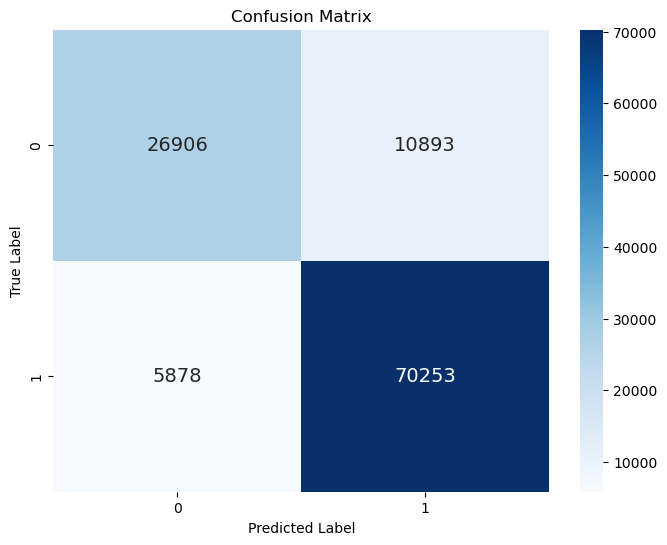

In [133]:
cm = confusion_matrix(y_train, y_pred_train)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [134]:
report = classification_report(y_test, y_pred_test)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.70     16198
           1       0.84      0.90      0.87     32630

    accuracy                           0.82     48828
   macro avg       0.80      0.78      0.79     48828
weighted avg       0.81      0.82      0.81     48828



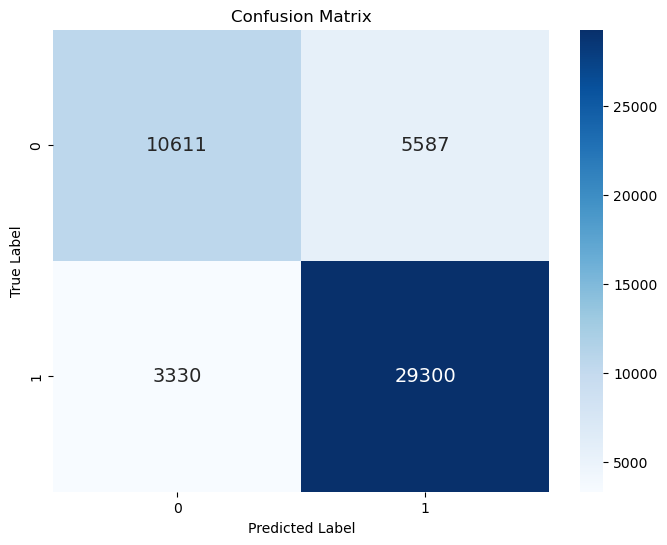

In [135]:
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [136]:
# accuracy_df = pd.DataFrame({
#     'Model': ['Logistic Regression'],
#     'Train Accuracy': [train_accuracy],
#     'Test Accuracy': [test_accuracy]
# })

### Hyperparameter tuning

In [137]:
from sklearn.metrics import ConfusionMatrixDisplay
def hptuning(model,param_grid,X_train,y_train,cv):
    grid_search = GridSearchCV(model,param_grid,cv=cv,return_train_score= True,n_jobs= -1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print("Best Hyperparameters:", best_params)
    print("Best Mean Test Score:", best_score)
    mean_train= grid_search.cv_results_['mean_train_score'][grid_search.best_index_]
    mean_test= grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
    train_std= grid_search.cv_results_['std_train_score'][grid_search.best_index_]
    test_std= grid_search.cv_results_['std_test_score'][grid_search.best_index_]
    print("Mean Train score :" , mean_train) 
    print('Std on Train set', train_std)
    print(" Mean Test score:" , mean_test) 
    print('Std on Test set:', test_std)
    bestestimator = grid_search.best_estimator_
    y_pred = bestestimator.predict(X_train)
    print(classification_report(y_train, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
    
    print("------------------------------------------------------------------")
    
    return bestestimator

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters: {'classifier__C': 10.0, 'classifier__penalty': 'l2', 'feature_selection__estimator__C': 10.0, 'feature_selection__estimator__penalty': 'l2'}
Best Mean Test Score: 0.8166856841920478
Mean Train score : 0.8648424471166507
Std on Train set 0.002749893687117207
 Mean Test score: 0.8166856841920478
Std on Test set: 0.002260905270322354
              precision    recall  f1-score   support

           0       0.81      0.74      0.77     37799
           1       0.87      0.91      0.89     76131

    accuracy                           0.85    113930
   macro avg       0.84      0.83      0.83    113930
weighted avg       0.85      0.85      0.85    113930

------------------------------------------------------------------


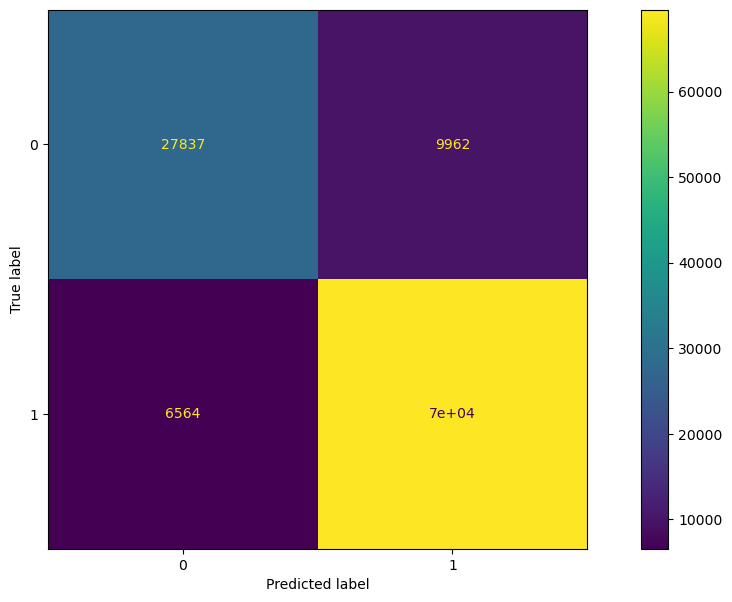

In [138]:
param_grid = {
    'feature_selection__estimator__C': [0.1, 1.0, 10.0],
    'feature_selection__estimator__penalty': ['l1', 'l2'],
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__penalty': ['l1', 'l2']
}
bestmodel = hptuning(pipeline,param_grid,combined_sparse,y_train,5)

### Using saga as solver since the data is very large.

In [139]:
# from sklearn.model_selection import GridSearchCV

# # Define the pipeline with SelectFromModel and LogisticRegression
# pipeline = Pipeline([
#     ('feature_selection', SelectFromModel(LogisticRegression(random_state=0))),
#     ('classifier', LogisticRegression(random_state=0))
# ])

# # Define the hyperparameter grid for GridSearchCV
# param_grid = {
#     'feature_selection__estimator__C': [0.1, 1.0, 10.0],
#     'feature_selection__estimator__penalty': ['l1', 'l2'],
#     'classifier__C': [0.1, 1.0, 10.0],
#     'classifier__penalty': ['l1', 'l2']
# }

# # Perform GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(combined_sparse, y_train)

# # Get the best hyperparameters and the corresponding mean test score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Hyperparameters:", best_params)
# print("Best Mean Test Score:", best_score)


# Best Hyperparameters: {'classifier__C': 10.0, 'classifier__penalty': 'l2', 'feature_selection__estimator__C': 10.0, 'feature_selection__estimator__penalty': 'l2'}
# Best Mean Test Score: 0.817054331607127

In [140]:
sagalgpipeline = Pipeline([
    ('feature_selection', SelectFromModel(LogisticRegression(random_state=0, solver='saga'))),
    ('classifier', LogisticRegression(random_state=0, solver='saga'))
])
sagalgpipeline.fit(combined_sparse, y_train)
saga_lg_y_pred_train = sagalgpipeline.predict(combined_sparse)
train_accuracy = accuracy_score(y_train, saga_lg_y_pred_train)
print("Accuracy:", train_accuracy)
saga_lg_y_pred_test = sagalgpipeline.predict(test_combined_sparse)
test_accuracy = accuracy_score(y_test, saga_lg_y_pred_test)
print("Accuracy:", test_accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.8666988501711578
Accuracy: 0.8205128205128205


In [141]:
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]
})

In [142]:
accuracy_df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.866699,0.820513


In [143]:
report = classification_report(y_train, y_pred_train)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76     37799
           1       0.87      0.92      0.89     76131

    accuracy                           0.85    113930
   macro avg       0.84      0.82      0.83    113930
weighted avg       0.85      0.85      0.85    113930



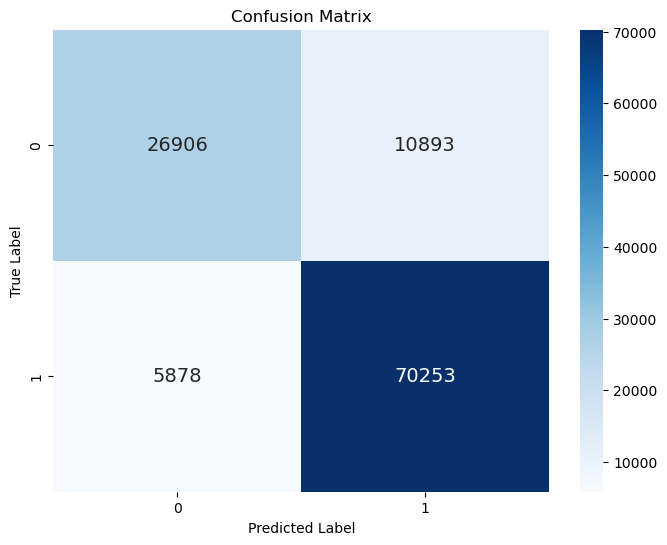

In [144]:
cm = confusion_matrix(y_train, y_pred_train)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [145]:
report = classification_report(y_test, y_pred_test)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.66      0.70     16198
           1       0.84      0.90      0.87     32630

    accuracy                           0.82     48828
   macro avg       0.80      0.78      0.79     48828
weighted avg       0.81      0.82      0.81     48828



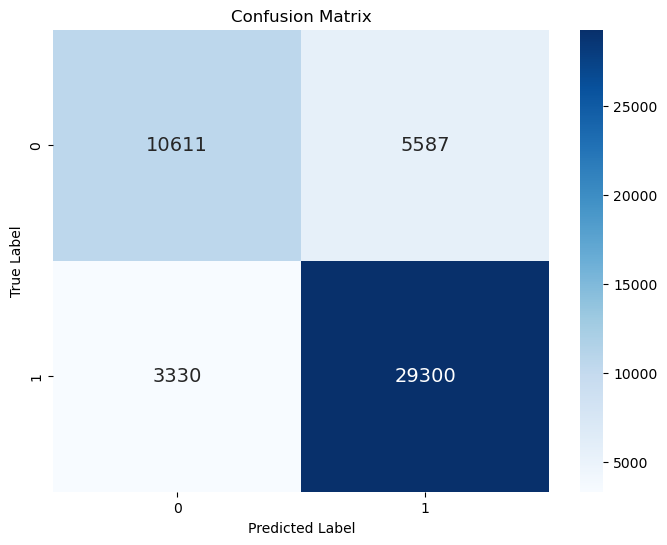

In [146]:
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Working with different models 

## SGDClassifier 

In [147]:
from sklearn.linear_model import SGDClassifier
SGDmodel = SGDClassifier(random_state=0)

# Fit the model on the training data
SGDmodel.fit(combined_sparse, y_train)

# Create a pipeline with SGDClassifier and SelectFromModel
SGDpipeline = Pipeline([
    ('feature_selection', SelectFromModel(SGDClassifier(random_state=0))),
    ('classifier', SGDClassifier(random_state=0))
])

# Fit the pipeline on the training data
SGDpipeline.fit(combined_sparse, y_train)

# Make predictions on the training data
SGD_y_pred_train = SGDpipeline.predict(combined_sparse)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, SGD_y_pred_train)
print("Accuracy:", train_accuracy)

Accuracy: 0.8327218467480032


In [148]:
SGDy_pred_test = SGDpipeline.predict(test_combined_sparse)
test_accuracy = accuracy_score(y_test, SGDy_pred_test)
print("Accuracy:", test_accuracy)

Accuracy: 0.8064839845990006


### Hyperparameter tuning SGDClassifier

In [149]:
from sklearn.model_selection import GridSearchCV

Best Hyperparameters: {'classifier__alpha': 0.0001, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'feature_selection__estimator__alpha': 0.01}
Best Mean Test Score: 0.8017554638813307
Mean Train score : 0.8288400772404106
Std on Train set 0.004091124252558423
 Mean Test score: 0.8017554638813307
Std on Test set: 0.0021607899307680128
              precision    recall  f1-score   support

           0       0.82      0.59      0.69     37799
           1       0.82      0.94      0.88     76131

    accuracy                           0.82    113930
   macro avg       0.82      0.76      0.78    113930
weighted avg       0.82      0.82      0.81    113930

------------------------------------------------------------------


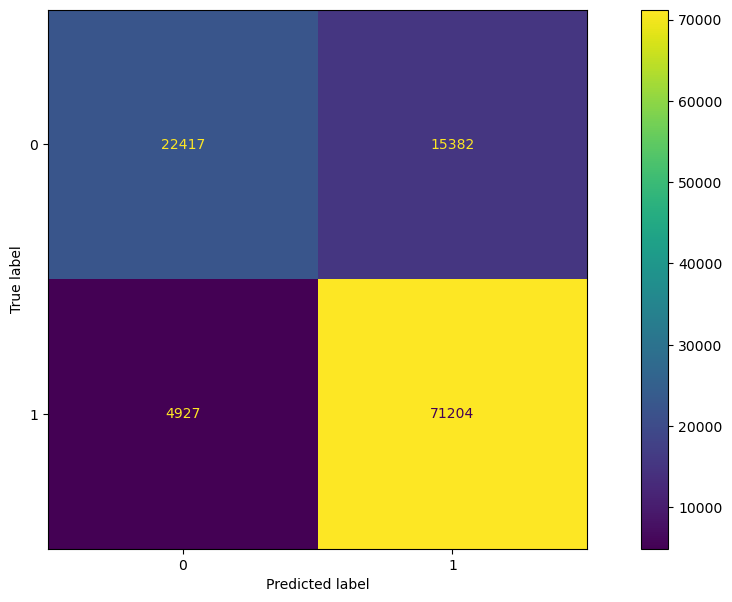

In [150]:
param_grid = {
    'feature_selection__estimator__alpha': [0.0001, 0.001, 0.01],
    'classifier__alpha': [0.0001, 0.001, 0.01],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__max_iter': [100, 200, 500]
}

bestmodel = hptuning(SGDpipeline,param_grid,combined_sparse,y_train,5)

In [151]:
SGDy_pred_test = bestmodel.predict(test_combined_sparse)
test_accuracy = accuracy_score(y_test, SGDy_pred_test)
print("Accuracy:", test_accuracy)

Accuracy: 0.8022241336937822


In [152]:
data = {'Model': 'SGDClassifier',
        'Train Accuracy': train_accuracy,
        'Test Accuracy' :test_accuracy
        }

accuracy_df = accuracy_df.append(data, ignore_index=True)

/tmp/ipykernel_20/1926869795.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append(data, ignore_index=True)


In [153]:
accuracy_df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.866699,0.820513
1,SGDClassifier,0.832722,0.802224


## LinearSVC

In [154]:
from sklearn.svm import LinearSVC

# Assuming you have already imported the necessary modules and defined combined_sparse and y_train

# Define the LinearSVC model with a random state
svc_model = LinearSVC(random_state=0)

# Fit the model on the training data
svc_model.fit(combined_sparse, y_train)

# Create a pipeline with LinearSVC and SelectFromModel
svc_pipeline = Pipeline([
    ('feature_selection', SelectFromModel(LinearSVC(random_state=0))),
    ('classifier', LinearSVC(random_state=0))
])

# Fit the pipeline on the training data
svc_pipeline.fit(combined_sparse, y_train)

# Make predictions on the training data
svc_y_pred_train = svc_pipeline.predict(combined_sparse)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, svc_y_pred_train)
print("Accuracy:", train_accuracy)
svc_y_pred_test = svc_pipeline.predict(test_combined_sparse)
test_accuracy = accuracy_score(y_test, svc_y_pred_test)
print("Accuracy:", test_accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.9102870183445976
Accuracy: 0.7949741951339395


### Hyperparameter tuning

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best Hyperparameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'feature_selection__estimator__C': 0.1, 'feature_selection__estimator__penalty': 'l2'}
Best Mean Test Score: 0.8178091810760992
Mean Train score : 0.8739971912577899
Std on Train set 0.0011374716815758298
 Mean Test score: 0.8178091810760992
Std on Test set: 0.002413299988338939
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     37799
           1       0.88      0.94      0.91     76131

    accuracy                           0.87    113930
   macro avg       0.87      0.84      0.85    113930
weighted avg       0.87      0.87      0.87    113930

------------------------------------------------------------------


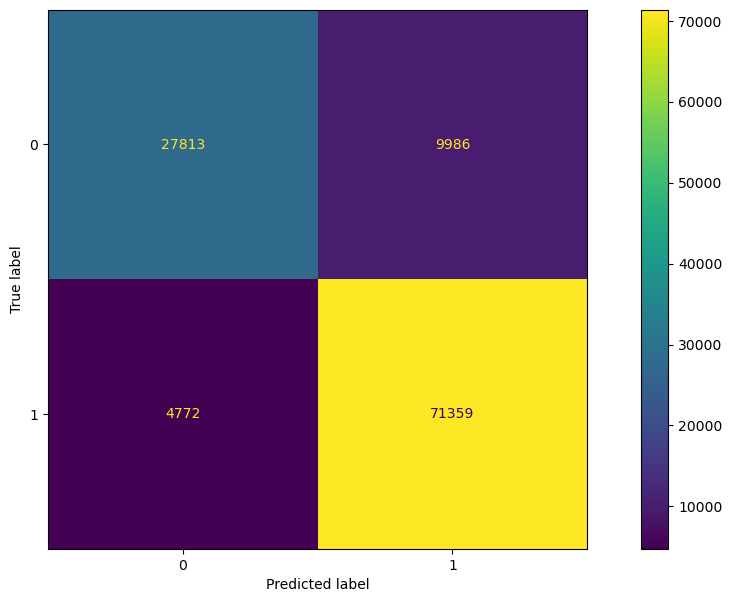

In [155]:
param_grid = {
    'feature_selection__estimator__C': [0.1, 1.0, 10.0],
    'feature_selection__estimator__penalty': ['l1', 'l2'],
    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__penalty': ['l1', 'l2']
}
bestmodel = hptuning(svc_pipeline,param_grid,combined_sparse,y_train,5)

In [156]:
SGDy_pred_test = bestmodel.predict(test_combined_sparse)
test_accuracy = accuracy_score(y_test, SGDy_pred_test)
print("Accuracy:", test_accuracy)

Accuracy: 0.8201236995166707


In [157]:
data = {'Model': 'LinearSVC',
        'Train Accuracy': train_accuracy,
        'Test Accuracy' :test_accuracy
        }

accuracy_df = accuracy_df.append(data, ignore_index=True)

/tmp/ipykernel_20/1496142711.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_df = accuracy_df.append(data, ignore_index=True)


# Comparing all models

In [158]:
accuracy_df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.866699,0.820513
1,SGDClassifier,0.832722,0.802224
2,LinearSVC,0.910287,0.820124


# Learnings from the models

### The best model is Logistic Regression with default values. 
* Other models do not perform as well as logistic regression.
* My intuition for sentiment analysis usually being used in the field of deep learning brings more confidence in the logistic regression model because it forms the intersection of deep learning and machine learning.
* The LinearSVC model achieved the highest train accuracy, indicating its potential for capturing complex patterns in the training data.
* Generalization Ability: The test accuracy scores for all three models are slightly lower than their corresponding train accuracy scores. This difference indicates that the models are not perfectly generalizing to unseen data. However, the differences are relatively small, which suggests that the models have good generalization ability and are not severely overfitting.
* More complex models (Logistic Regression and LinearSVC) might be better suited for capturing the underlying sentiment patterns in movie reviews compared to the simpler SGDClassifier.
* Interpretability vs. Complexity: While LinearSVC achieved the highest train accuracy, it's important to note that it might be more complex to interpret compared to Logistic Regression. Logistic Regression, being a linear model, might provide more intuitive insights into the impact of features on sentiment prediction.


# Training the best model on the whole train dataset

In [159]:
def preprocessfinaldatasets(X_train,X_test, y):
    X_train = preprocess(X_train)
    X_test=preprocess(X_test)
    numeric_features = ['runtimeMinutes', 'audienceScore', 'boxOffice']
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    X_train[numeric_features] = numeric_transformer.fit_transform(X_train[numeric_features])
    X_train['isFrequentReviewer'] = X_train['isFrequentReviewer'].astype(int)
    mlb = MultiLabelBinarizer()
    genre_encoded = mlb.fit_transform(X_train['genre'])
    genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=X_train.index)
    X_train= pd.concat([X_train, genre_encoded_df], axis=1)
    X_train.drop('genre', axis=1, inplace=True)
    originalLanguagemlb = MultiLabelBinarizer()
    originalLanguage_encoded = originalLanguagemlb.fit_transform(X_train['originalLanguage'])
    originalLanguage_encoded_df = pd.DataFrame(originalLanguage_encoded, columns=originalLanguagemlb.classes_, index=X_train.index)
    X_train= pd.concat([X_train, originalLanguage_encoded_df], axis=1)
    X_train.drop('originalLanguage', axis=1, inplace=True)
    ratingmlb = MultiLabelBinarizer()
    rating_encoded = ratingmlb.fit_transform(X_train['rating'])
    rating_encoded_df = pd.DataFrame(rating_encoded, columns=ratingmlb.classes_, index=X_train.index)
    X_train= pd.concat([X_train, rating_encoded_df], axis=1)
    X_train.drop('rating', axis=1, inplace=True)
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(X_train['reviewText'])
    X_train.drop('reviewText', axis=1, inplace=True)
    directormlb = MultiLabelBinarizer(sparse_output=True)
    director_encoded = directormlb.fit_transform(X_train['director'])
    yearmlb = MultiLabelBinarizer(sparse_output=True)
    year_encoded = yearmlb.fit_transform(X_train['year'])
    distributormlb = MultiLabelBinarizer(sparse_output=True)
    distributor_encoded = distributormlb.fit_transform(X_train['distributor'])
    reviewerNamemlb = MultiLabelBinarizer(sparse_output=True)
    reviewerName_encoded = reviewerNamemlb.fit_transform(X_train['reviewerName'])
    ratingContentsmlb = MultiLabelBinarizer(sparse_output=True)
    ratingContents_encoded = ratingContentsmlb.fit_transform(X_train['ratingContents'])
    X_train_sparse = X_train.drop(['director', 'year', 'distributor', 'reviewerName', 'ratingContents'], axis=1)
    X_train_sparse = csr_matrix(X_train_sparse)
    combined_sparse = hstack([X_train_sparse, director_encoded, year_encoded, distributor_encoded, reviewerName_encoded, tfidf_matrix], format='csr')
    X_test[numeric_features] = numeric_transformer.transform(X_test[numeric_features])
    X_test.rename(columns={'isTopCritic': 'isFrequentReviewer'}, inplace=True)
    X_test['isFrequentReviewer'] = X_test['isFrequentReviewer'].astype(int)
    genre_encoded = mlb.transform(X_test['genre'])
    genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=X_test.index)
    X_test= pd.concat([X_test, genre_encoded_df], axis=1)
    X_test.drop('genre', axis=1, inplace=True)
    originalLanguage_encoded = originalLanguagemlb.transform(X_test['originalLanguage'])
    originalLanguage_encoded_df = pd.DataFrame(originalLanguage_encoded, columns=originalLanguagemlb.classes_, index=X_test.index)
    X_test= pd.concat([X_test, originalLanguage_encoded_df], axis=1)
    X_test.drop('originalLanguage', axis=1, inplace=True)
    rating_encoded = ratingmlb.transform(X_test['rating'])
    rating_encoded_df = pd.DataFrame(rating_encoded, columns=ratingmlb.classes_, index=X_test.index)
    X_test= pd.concat([X_test, rating_encoded_df], axis=1)
    X_test.drop('rating', axis=1, inplace=True)
    tfidf_matrix = tfidf_vectorizer.transform(X_test['reviewText'])
    X_test.drop('reviewText', axis=1, inplace=True)
    director_encoded = directormlb.transform(X_test['director'])
    year_encoded = yearmlb.transform(X_test['year'])
    distributor_encoded = distributormlb.transform(X_test['distributor'])
    reviewerName_encoded = reviewerNamemlb.transform(X_test['reviewerName'])
    ratingContents_encoded = ratingContentsmlb.transform(X_test['ratingContents'])
    X_test_sparse = X_test.drop(['director', 'year', 'distributor', 'reviewerName', 'ratingContents'], axis=1)
    X_test_sparse = csr_matrix(X_test_sparse)
    test_combined_sparse = hstack([X_test_sparse, director_encoded, year_encoded, distributor_encoded, reviewerName_encoded, tfidf_matrix], format='csr')
    y = y.map({'POSITIVE': 1, 'NEGATIVE': 0})
    return combined_sparse,test_combined_sparse, y

In [160]:
combined_sparse,test_combined_sparse,y = preprocessfinaldatasets(X,test, y)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['Alice Jennings', 'Alice Rodman', 'Amy Cooper', 'Andrew Remillard', 'Anthony Mccraken', 'April Black', 'Barry Currence', 'Becky Randall', 'Bonnie Morel', 'Bradford Cronin', 'Carl Bowden', 'Carla Chitwood', 'Carlos Mason', 'Carlos Talley', 'Charles Burks', 'Cheryl Wade', 'David Fryberger', 'Debbie Moy', 'Diana Coates', 'Donald Stitt', 'Donna Torres', 'Dorathy Cozzolino', 'Elizabeth Mosley', 'Evan Sewell', 'Floyd Jennins', 'Frederick Titcomb', 'Gary Meyer', 'George Harris', 'Gerald Bagwell', 'Harlan Stapleton', 'Harry Carter', 'Helen Stump', 'Janice Fox', 'Jeff Parker', 'Jenna Ford', 'Jennifer Speer', 'Jocelyn Jones', 'Jose Adkins', 'Juliette Montoya', 'Karina Abbott', 'Katherine Mullin', 'Kimberly Kay', 'Kristina Kelly', 'Lawrence Galvan', 'Lynn Clark', 'Mandie Filippini', 'Margaret Jacobson', 'Maria Swoope', 'Mary Sines', 'Miguel Usher', 'Misti Smith', 'Nellie Mcgray', 'Nestor S

In [161]:
pipeline = Pipeline([
    ('feature_selection', SelectFromModel(LogisticRegression(solver='saga', random_state=0))),
    ('classifier', LogisticRegression(solver='saga', random_state=0))
])
# Fit the pipeline on the data
pipeline.fit(combined_sparse, y)

# Make predictions on the training data
y_pred_train = pipeline.predict(combined_sparse)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_train)
print("Accuracy:", accuracy)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.8646210938940021


In [162]:
# X = X.merge(consolidated_movies, on='movieid', how='left')

In [163]:
# X.head()

In [164]:
# X.drop('movieid', axis=1,inplace=True)
# X.drop('soundType', axis=1,inplace=True)

In [165]:
# X['year'] = X['combinedReleaseDates'].dt.year.astype(str)

# # Now 'year' column will contain the year extracted from the datetime values
# print(X['year'])

In [166]:
# X.drop('combinedReleaseDates', axis=1, inplace=True)

In [167]:
# X['genre'].fillna('Unknown', inplace=True)
# X['originalLanguage'].fillna('Unknownlanguage', inplace=True)
# X['rating'].fillna('No rating', inplace=True)
# X['distributor'].fillna('No distributor' , inplace=True)
# X['reviewText'].fillna('', inplace=True)
# def join_list_to_string(lst):
#     if pd.isna(lst):  # Check if lst is NaN
#         return ['No ratingContent']
#     return lst

# # Apply the custom function to the "ratingContents" column
# X['ratingContents'] = X['ratingContents'].apply(join_list_to_string)

In [168]:
# X['genre'] = X['genre'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
# X['originalLanguage'] = X['originalLanguage'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
# X['rating'] = X['rating'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
# X['director'] = X['director'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else x)
# X['distributor'] = X['distributor'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])

# def strip_rating_contents(rating_contents):
#   """Strips the beginning [ and ending ] from the list entry in each row,
#   and strips off the '' of the strings inside it also to just make a comma
#   separated Sexual Content, Drug Content, Thematic Elements.

#   Args:
#     rating_contents: The rating contents column of the DataFrame.

#   Returns:
#     A string of the comma separated Sexual Content, Drug Content, Thematic Elements.
#   """
#   rating_contents = str(rating_contents)
#   rating_contents = rating_contents.replace("[", "")
#   rating_contents = rating_contents.replace("]", "")
#   rating_contents = rating_contents.replace("'", "")
#   return rating_contents

# X["ratingContents"] = X["ratingContents"].apply(strip_rating_contents)
# X['ratingContents'] = X['ratingContents'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])

In [169]:
# # Assuming X_train contains your data
# numeric_features = ['runtimeMinutes', 'audienceScore', 'boxOffice']

# # Create a pipeline for standard scaling of numeric features
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# # Apply the pipeline to the numeric features
# X[numeric_features] = numeric_transformer.fit_transform(X[numeric_features])

In [170]:
# runtimeMinutesscaler = StandardScaler()
# X['runtimeMinutes'] = runtimeMinutesscaler.fit_transform(X['runtimeMinutes'].values.reshape(-1, 1))
# audienceScorescaler = StandardScaler()
# X['audienceScore'] = audienceScorescaler.fit_transform(X['audienceScore'].values.reshape(-1, 1))
# boxOfficescaler = StandardScaler()
# X['boxOffice'] = boxOfficescaler.fit_transform(X['boxOffice'].values.reshape(-1, 1))

In [171]:
# X['isFrequentReviewer'] = X['isFrequentReviewer'].astype(int)

In [172]:
# mlb = MultiLabelBinarizer()
# genre_encoded = mlb.fit_transform(X['genre'])

# # Step 3: Create a DataFrame from the encoded genres
# genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=X.index)
# # Step 4: Concatenate the original DataFrame with the encoded DataFrame
# X= pd.concat([X, genre_encoded_df], axis=1)
# # Drop the original 'genre' column as it is no longer needed
# X.drop('genre', axis=1, inplace=True)

In [173]:
# import pandas as pd
# from sklearn.preprocessing import MultiLabelBinarizer

# # Step 2: Apply MultiLabelBinarizer to one-hot encode the lists of genres
# originalLanguagemlb = MultiLabelBinarizer()
# originalLanguage_encoded = originalLanguagemlb.fit_transform(X['originalLanguage'])

# # Step 3: Create a DataFrame from the encoded genres
# originalLanguage_encoded_df = pd.DataFrame(originalLanguage_encoded, columns=originalLanguagemlb.classes_, index=X.index)


# # Step 4: Concatenate the original DataFrame with the encoded DataFrame
# X= pd.concat([X, originalLanguage_encoded_df], axis=1)
# # Drop the original 'genre' column as it is no longer needed
# X.drop('originalLanguage', axis=1, inplace=True)

In [174]:
# import pandas as pd
# from sklearn.preprocessing import MultiLabelBinarizer
# # Step 2: Apply MultiLabelBinarizer to one-hot encode the lists of genres
# ratingmlb = MultiLabelBinarizer()
# rating_encoded = ratingmlb.fit_transform(X['rating'])

# # Step 3: Create a DataFrame from the encoded genres
# rating_encoded_df = pd.DataFrame(rating_encoded, columns=ratingmlb.classes_, index=X.index)


# # Step 4: Concatenate the original DataFrame with the encoded DataFrame
# X= pd.concat([X, rating_encoded_df], axis=1)
# # Drop the original 'genre' column as it is no longer needed
# X.drop('rating', axis=1, inplace=True)

In [175]:
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(X['reviewText'])

In [176]:
# X.drop('reviewText', axis=1, inplace=True)

In [177]:
# # Step 2: Apply MultiLabelBinarizer to one-hot encode the lists of genres
# directormlb = MultiLabelBinarizer(sparse_output=True)
# director_encoded = directormlb.fit_transform(X['director'])

In [178]:
# yearmlb = MultiLabelBinarizer(sparse_output=True)
# year_encoded = yearmlb.fit_transform(X['year'])


In [179]:
# # Step 2: Apply MultiLabelBinarizer to one-hot encode the lists of genres
# distributormlb = MultiLabelBinarizer(sparse_output=True)
# distributor_encoded = distributormlb.fit_transform(X['distributor'])

In [180]:
# reviewerNamemlb = MultiLabelBinarizer(sparse_output=True)
# reviewerName_encoded = reviewerNamemlb.fit_transform(X['reviewerName'])

In [181]:
# ratingContentsmlb = MultiLabelBinarizer(sparse_output=True)
# ratingContents_encoded = ratingContentsmlb.fit_transform(X['ratingContents'])

In [182]:
# from scipy.sparse import csr_matrix, hstack

# # Assuming you have already created the sparse matrices:
# # director_encoded, year_encoded, distributor_encoded, reviewerName_encoded, tfidf_matrix

# # Drop the categorical features from the X_train dataframe
# X_sparse = X.drop(['director', 'year', 'distributor', 'reviewerName', 'ratingContents'], axis=1)

# # Convert the remaining dataframe to a sparse matrix in CSR format
# X_sparse = csr_matrix(X_sparse)

# # Combine the sparse matrices
# combined_sparse = hstack([X_sparse, director_encoded, year_encoded, distributor_encoded, reviewerName_encoded, tfidf_matrix], format='csr')

In [183]:
# y = y.map({'POSITIVE': 1, 'NEGATIVE': 0})

In [184]:
# model = LogisticRegression(solver='saga', random_state=0)
# model.fit(combined_sparse, y)
# y_pred_X = model.predict(combined_sparse)
# accuracy = accuracy_score(y, y_pred_X)
# print("Accuracy:", accuracy)

In [185]:
# pipeline = Pipeline([
#     ('feature_selection', SelectFromModel(LogisticRegression(solver='saga', random_state=0))),
#     ('classifier', LogisticRegression(solver='saga', random_state=0))
# ])
# # Fit the pipeline on the data
# pipeline.fit(combined_sparse, y)

# # Make predictions on the training data
# y_pred_train = pipeline.predict(combined_sparse)

# # Calculate accuracy
# accuracy = accuracy_score(y, y_pred_train)
# print("Accuracy:", accuracy)

In [186]:
# pipeline = Pipeline([
#     ('feature_selection', SelectFromModel(LogisticRegression(solver='saga', random_state=0))),
#     ('classifier', LogisticRegression(solver='saga', random_state=0))
# ])
# # Fit the pipeline on the data
# pipeline.fit(combined_sparse, y)

# # Make predictions on the training data
# y_pred_train = pipeline.predict(combined_sparse)

# # Calculate accuracy
# accuracy = accuracy_score(y, y_pred_train)
# print("Accuracy:", accuracy)

In [187]:
# model = LogisticRegression()
# model.fit(combined_sparse, y)
# selector = SelectFromModel(estimator=model)
# selector.fit(combined_sparse, y)
# combined_train_selected = selector.transform(combined_sparse)
# model = LogisticRegression()
# model.fit(combined_train_selected, y)
# y_pred_X = model.predict(combined_train_selected)
# accuracy = accuracy_score(y, y_pred_X)
# print("Accuracy:", accuracy)

In [188]:
# test_merged_data=test.merge(consolidated_movies, on='movieid', how='left')

In [189]:
# test_merged_data.drop('movieid', axis=1,inplace=True)

In [190]:
# test_merged_data.drop('soundType', axis=1,inplace=True)

In [191]:
# test_merged_data['year'] = test_merged_data['combinedReleaseDates'].dt.year.astype(str)

# # Now 'year' column will contain the year extracted from the datetime values
# print(test_merged_data['year'])

In [192]:
# test_merged_data.drop('combinedReleaseDates', axis=1,inplace=True)

In [193]:
# test_merged_data['genre'].fillna('Unknown', inplace=True)
# test_merged_data['originalLanguage'].fillna('Unknownlanguage', inplace=True)
# test_merged_data['rating'].fillna('No rating', inplace=True)
# test_merged_data['distributor'].fillna('No distributor' , inplace=True)
# test_merged_data['reviewText'].fillna('', inplace=True)
# def join_list_to_string(lst):
#     if pd.isna(lst):  # Check if lst is NaN
#         return ['No ratingContent']
#     return lst

# # Apply the custom function to the "ratingContents" column
# test_merged_data['ratingContents'] = test_merged_data['ratingContents'].apply(join_list_to_string)

In [194]:
# test_merged_data['genre'] = test_merged_data['genre'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
# test_merged_data['originalLanguage'] = test_merged_data['originalLanguage'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
# test_merged_data['rating'] = test_merged_data['rating'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])
# test_merged_data['director'] = test_merged_data['director'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else x)
# test_merged_data['distributor'] = test_merged_data['distributor'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])

# def strip_rating_contents(rating_contents):
#   """Strips the beginning [ and ending ] from the list entry in each row,
#   and strips off the '' of the strings inside it also to just make a comma
#   separated Sexual Content, Drug Content, Thematic Elements.

#   Args:
#     rating_contents: The rating contents column of the DataFrame.

#   Returns:
#     A string of the comma separated Sexual Content, Drug Content, Thematic Elements.
#   """
#   rating_contents = str(rating_contents)
#   rating_contents = rating_contents.replace("[", "")
#   rating_contents = rating_contents.replace("]", "")
#   rating_contents = rating_contents.replace("'", "")
#   return rating_contents

# test_merged_data["ratingContents"] = test_merged_data["ratingContents"].apply(strip_rating_contents)
# test_merged_data['ratingContents'] = test_merged_data['ratingContents'].apply(lambda x: list(set(x.split(', '))) if isinstance(x, str) else [])

In [195]:
# test_merged_data[numeric_features] = numeric_transformer.transform(test_merged_data[numeric_features])

In [196]:
# test_merged_data['runtimeMinutes'] = runtimeMinutesscaler.transform(test_merged_data['runtimeMinutes'].values.reshape(-1, 1))
# test_merged_data['audienceScore'] = audienceScorescaler.transform(test_merged_data['audienceScore'].values.reshape(-1, 1))
# test_merged_data['boxOffice'] = boxOfficescaler.transform(test_merged_data['boxOffice'].values.reshape(-1, 1))

In [197]:
# test_merged_data.rename(columns={'isTopCritic': 'isFrequentReviewer'}, inplace=True)
# test_merged_data['isFrequentReviewer'] = test_merged_data['isFrequentReviewer'].astype(int)

In [198]:
# genre_encoded = mlb.transform(test_merged_data['genre'])
# genre_encoded_df = pd.DataFrame(genre_encoded, columns=mlb.classes_, index=test_merged_data.index)
# test_merged_data= pd.concat([test_merged_data, genre_encoded_df], axis=1)
# test_merged_data.drop('genre', axis=1, inplace=True)

In [199]:
# originalLanguage_encoded = originalLanguagemlb.transform(test_merged_data['originalLanguage'])
# originalLanguage_encoded_df = pd.DataFrame(originalLanguage_encoded, columns=originalLanguagemlb.classes_, index=test_merged_data.index)
# test_merged_data= pd.concat([test_merged_data, originalLanguage_encoded_df], axis=1)
# test_merged_data.drop('originalLanguage', axis=1, inplace=True)

In [200]:
# rating_encoded = ratingmlb.transform(test_merged_data['rating'])

# # Step 3: Create a DataFrame from the encoded genres
# rating_encoded_df = pd.DataFrame(rating_encoded, columns=ratingmlb.classes_, index=test_merged_data.index)


# # Step 4: Concatenate the original DataFrame with the encoded DataFrame
# test_merged_data= pd.concat([test_merged_data, rating_encoded_df], axis=1)
# # Drop the original 'genre' column as it is no longer needed
# test_merged_data.drop('rating', axis=1, inplace=True)

In [201]:
# tfidf_matrix = tfidf_vectorizer.transform(test_merged_data['reviewText'])
# test_merged_data.drop('reviewText', axis=1, inplace=True)

In [202]:
# director_encoded = directormlb.transform(test_merged_data['director'])

In [203]:
# year_encoded = yearmlb.transform(test_merged_data['year'])

In [204]:
# distributor_encoded = distributormlb.transform(test_merged_data['distributor'])

In [205]:
# reviewerName_encoded = reviewerNamemlb.transform(test_merged_data['reviewerName'])

In [206]:
# ratingContents_encoded = ratingContentsmlb.transform(test_merged_data['ratingContents'])

In [207]:
# from scipy.sparse import csr_matrix, hstack

# # Assuming you have already created the sparse matrices:
# # director_encoded, year_encoded, distributor_encoded, reviewerName_encoded, tfidf_matrix

# # Drop the categorical features from the X_train dataframe
# test_merged_sparse = test_merged_data.drop(['director', 'year', 'distributor', 'reviewerName', 'ratingContents'], axis=1)

# # Convert the remaining dataframe to a sparse matrix in CSR format
# test_merged_sparse = csr_matrix(test_merged_sparse)

# # Combine the sparse matrices
# test_combined_sparse = hstack([test_merged_sparse, director_encoded, year_encoded, distributor_encoded, reviewerName_encoded, tfidf_matrix], format='csr')

In [208]:
# selected_test_combined_sparse = selector.transform(test_combined_sparse)

In [209]:
# ypredtest = model.predict(selected_test_combined_sparse)

In [210]:
ypredtest = pipeline.predict(test_combined_sparse)

In [211]:
# ypredtest=model.predict(test_combined_sparse)

In [212]:
ypredtestf=[]
pos=0
neg=0
for i in range(len(ypredtest)):
    if ypredtest[i]==1:
        ypredtestf.append('POSITIVE')
        pos+=1
    else:
        ypredtestf.append('NEGATIVE')
        neg+=1

In [213]:
sub = pd.DataFrame(ypredtestf, columns=['sentiment'])
sub.index.name = 'id'
sub = sub.reset_index()
sub.to_csv("submission.csv", encoding='utf-8', index=False)

In [214]:
letsread=pd.read_csv('submission.csv')

In [215]:
letsread['sentiment'].value_counts()

POSITIVE    39624
NEGATIVE    15691
Name: sentiment, dtype: int64

In [216]:
letsread.tail()

,id,sentiment
55310,55310,POSITIVE
55311,55311,NEGATIVE
55312,55312,NEGATIVE
55313,55313,POSITIVE
55314,55314,NEGATIVE


In [217]:
letsread.head(25)

,id,sentiment
0,0,POSITIVE
1,1,POSITIVE
2,2,POSITIVE
3,3,POSITIVE
4,4,POSITIVE
5,5,POSITIVE
6,6,POSITIVE
7,7,NEGATIVE
8,8,POSITIVE
9,9,NEGATIVE


# NEW MODEL (CONSIDERING ONLY REVIEWTEXT)

In [218]:
# import pandas as pd
# import numpy as np
# train=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')

In [219]:
# train.head()

In [220]:
# train.info()

In [221]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


In [222]:
# train.describe()

In [223]:
# train.nunique()

In [224]:
# train.shape

In [225]:
# train.isna().sum()

In [226]:
# train.dropna(inplace=True)

In [227]:
# train.isna().sum()

In [228]:
# train.shape

In [229]:
# train.head()

In [230]:
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.feature_extraction.text import TfidfVectorizer

In [231]:
# train['sentiment']=LabelBinarizer().fit_transform(train['sentiment'])

In [232]:
# train['isFrequentReviewer']=LabelBinarizer().fit_transform(train['isFrequentReviewer'])

In [233]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.feature_extraction import FeatureHasher

In [234]:
# X = train[['reviewText', 'reviewerName', 'isFrequentReviewer']]
# y = train['sentiment']

In [235]:
# reviewer_names = [[name] for name in X['reviewerName']]

# # Perform feature hashing on reviewer names
# hasher = FeatureHasher(n_features=1000, input_type='string')
# hashed_reviewer_names = hasher.transform(reviewer_names)

In [236]:
# tfidf = TfidfVectorizer()
# tfidf_reviews = tfidf.fit_transform(X['reviewText'])

In [237]:
# is_frequent_reviewer = X['isFrequentReviewer'].astype(int).values.reshape(-1, 1)

In [238]:
# from scipy.sparse import hstack
# X_combined = hstack([hashed_reviewer_names, tfidf_reviews, is_frequent_reviewer])

In [239]:
# X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [240]:
# from sklearn.dummy import DummyClassifier

In [241]:
# model = DummyClassifier()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [242]:
# test=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')


In [243]:
# ctest=test.copy()

In [244]:
# ctest['reviewText'].fillna('', inplace=True)

In [245]:
# reviewer_names = [[name] for name in ctest['reviewerName']]

# # Perform feature hashing on reviewer names
# hasher = FeatureHasher(n_features=1000, input_type='string')
# hashed_reviewer_names = hasher.transform(reviewer_names)
# tfidf = TfidfVectorizer()
# tfidf_reviews = tfidf.fit_transform(ctest['reviewText'])
# is_frequent_reviewer = ctest['isTopCritic'].astype(int).values.reshape(-1, 1)
# ctestcombined = hstack([hashed_reviewer_names, tfidf_reviews, is_frequent_reviewer])
# ypredtest=model.predict(ctestcombined)


In [246]:
# sample=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv')

In [247]:
# sample.shape

In [248]:
# submission = pd.DataFrame(columns=['id', 'sentiment'])
# submission['id']=[i for i in range(sample.shape[0])]

In [249]:
# ypredtestf=[]
# for i in range(len(ypredtest)):
#     if ypredtest[i]==1:
#         ypredtestf.append('POSITIVE')
#     else:
#         ypredtestf.append('NEGATIVE')

In [250]:
# submission['sentiment']=ypredtestf
# submission.to_csv('submission.csv', index=False)

In [251]:
# train=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')

In [252]:
# train.shape

In [253]:
# train.dropna(inplace=True)

In [254]:
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# train['sentiment']=LabelBinarizer().fit_transform(train['sentiment'])
# train['isFrequentReviewer']=LabelBinarizer().fit_transform(train['isFrequentReviewer'])

In [255]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.feature_extraction import FeatureHasher

In [256]:
# X = train[['reviewText', 'reviewerName', 'isFrequentReviewer']]
# y = train['sentiment']

In [257]:
# reviewer_names = [[name] for name in X['reviewerName']]

# # Perform feature hashing on reviewer names
# hasher = FeatureHasher(n_features=1000, input_type='string')
# hashed_reviewer_names = hasher.transform(reviewer_names)

In [258]:
# tfidf = TfidfVectorizer()
# tfidf.fit(X['reviewText'])
# tfidf_reviews = tfidf.transform(X['reviewText'])

In [259]:
# is_frequent_reviewer = X['isFrequentReviewer'].astype(int).values.reshape(-1, 1)

In [260]:
# from scipy.sparse import hstack
# X_combined = hstack([hashed_reviewer_names, tfidf_reviews, is_frequent_reviewer])

In [261]:
# X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [262]:
# from sklearn.linear_model import LogisticRegression

In [263]:
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [264]:
# X_train.shape

In [265]:
# test=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')

In [266]:
# ctest=test.copy()
# ctest['reviewText'].fillna('', inplace=True)
# reviewer_names = [[name] for name in ctest['reviewerName']]

# # Perform feature hashing on reviewer names
# hasher = FeatureHasher(n_features=1000, input_type='string')
# hashed_reviewer_names = hasher.transform(reviewer_names)
# tfidf_reviews = tfidf.transform(ctest['reviewText'])
# is_frequent_reviewer = ctest['isTopCritic'].astype(int).values.reshape(-1, 1)
# ctestcombined = hstack([hashed_reviewer_names, tfidf_reviews, is_frequent_reviewer])

In [267]:
# ypredtest=model.predict(ctestcombined)

In [268]:
# sample=pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv')
# sample.shape

In [269]:
# submission = pd.DataFrame(columns=['id', 'sentiment'])
# submission['id']=[i for i in range(sample.shape[0])]

In [270]:
# ypredtestf=[]
# for i in range(len(ypredtest)):
#     if ypredtest[i]==1:
#         ypredtestf.append('POSITIVE')
#     else:
#         ypredtestf.append('NEGATIVE')

In [271]:
# submission['sentiment']=ypredtestf
# submission.to_csv('submission.csv', index=False)